## Importing:

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from time import time
from IPython.display import display # Allows the use of display() for DataFrames


# Pretty display for notebooks
%matplotlib inline

# Reading the data:

In [ ]:
df=  pd.read_csv('/content/student-por.csv',sep=';')

In [ ]:
df.head

<bound method NDFrame.head of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freet

In [ ]:
df.shape

(649, 33)

# Preprocessing the data:

#### Dropping duplicate rows

In [ ]:
df.drop_duplicates()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


#### Creating a new column called averageG 

In [ ]:
avg = (df.G1+df.G2+df.G3)/3

In [ ]:
avg

0       7.333333
1      10.333333
2      12.333333
3      14.000000
4      12.333333
         ...    
644    10.333333
645    15.333333
646    10.666667
647    10.000000
648    10.666667
Length: 649, dtype: float64

In [ ]:
df2 = df.assign(averageG=avg)

In [ ]:
df2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,averageG
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,7.333333
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,10.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,12.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,14.000000
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,12.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,10.333333
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,15.333333
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,10.666667
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,10.000000


#### Creating a new column Pedu (Fedu + Medu)

In [ ]:
Pedu = (df2.Fedu + df2.Medu)/2
df2['Pedu'] = Pedu
df2.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,averageG,Pedu
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009,11.625064,2.410632
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656,2.833360,1.014035
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.333333,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000,10.000000,1.500000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000,11.666667,2.500000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,13.333333,3.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000,18.666667,4.000000


In [ ]:
df2.drop(['Fedu','Medu'],
  axis='columns', inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      649 non-null    object 
 1   sex         649 non-null    object 
 2   age         649 non-null    int64  
 3   address     649 non-null    object 
 4   famsize     649 non-null    object 
 5   Pstatus     649 non-null    object 
 6   Mjob        649 non-null    object 
 7   Fjob        649 non-null    object 
 8   reason      649 non-null    object 
 9   guardian    649 non-null    object 
 10  traveltime  649 non-null    int64  
 11  studytime   649 non-null    int64  
 12  failures    649 non-null    int64  
 13  schoolsup   649 non-null    object 
 14  famsup      649 non-null    object 
 15  paid        649 non-null    object 
 16  activities  649 non-null    object 
 17  nursery     649 non-null    object 
 18  higher      649 non-null    object 
 19  internet    649 non-null    o

In [ ]:
df2.describe()

,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,averageG,Pedu
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009,11.625064,2.410632
std,1.218138,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656,2.833360,1.014035
min,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.333333,0.000000
25%,16.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000,10.000000,1.500000
50%,17.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000,11.666667,2.500000
75%,18.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,13.333333,3.000000
max,22.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000,18.666667,4.000000


# Clearing outliers:

We use the IQR to clear outliers

In [ ]:
df2.averageG.median()

11.666666666666666

In [ ]:
Q1 = df2.averageG.quantile(.25)
Q3 = df2.averageG.quantile(.75)
IQR = Q3 - Q1
upper = df2.averageG.median() + IQR 
lower = df2.averageG.median() - IQR 
print(lower,upper)
#df = df.clip(lower=lower, upper=upper)

8.333333333333332 15.0


In [ ]:
df_temp = df2[df2.averageG >= lower]
df3 = df_temp[df_temp.averageG <= upper]

# Exploratory Visualization:

### We try to explore the following questions:

i.	Which students wish to continue higher education? 

ii.	Which students pay for extra education?

iii.	Which students receive financial family support?

iv.	Which students are engaged in a romantic relationship?

v.	 What is the type of student's home address?

### We also try to explore the following questions:

i.	Does internet access affect the final grade of the student?

ii.	Does the romantic relationship affect the final grade of the student?

iii.	Does alcohol consumption affect the final grade of the student?

iv.	Does the quality of family relationships affect the final grade of the student?

v.	Does the grade of the first and second periods determine the final grade?



In [ ]:
# to change the size of all figures 
sns.set(rc={'figure.figsize':(8,6)})
plt.figure(figsize = [8, 8])

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [ ]:
# this function is used to add labels and title to the plot, and to set it to grid or not
def insert_labels_title(xlabel=None, ylabel=None, title=None, grid=None, legends=None):
    if(legends!=None):
        plt.legend(legends)
    if(grid!=None):
        plt.legend(grid)
    if(xlabel!=None):
        plt.xlabel(xlabel)
    if(ylabel!=None):
        plt.ylabel(ylabel)
    if(title!=None):
        plt.title(title)
    

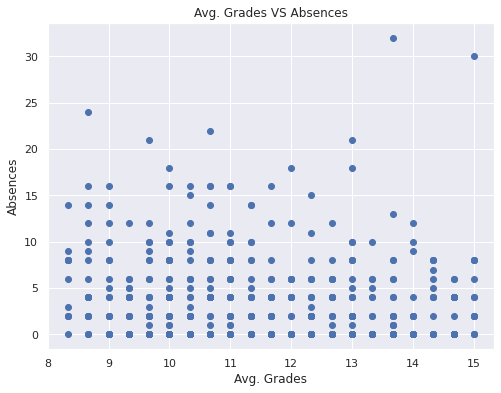

In [ ]:
plt.plot(df3.averageG,df3.absences,'o')
insert_labels_title(xlabel='Avg. Grades',ylabel='Absences',title='Avg. Grades VS Absences')

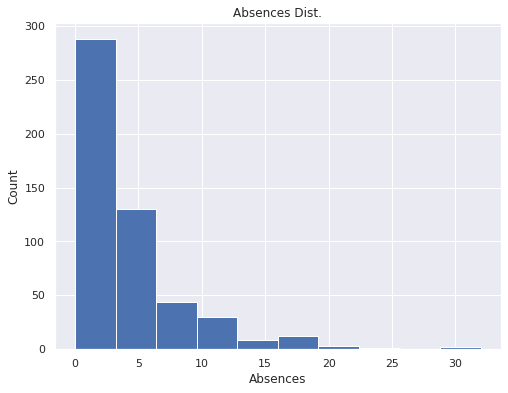

In [ ]:
plt.hist(df3.absences, bins = 10)
insert_labels_title(xlabel='Absences',ylabel='Count',title='Absences Dist.')

We can see that the distribution of **absences** is strongly right skewed.

(array([32., 20., 47., 42., 29., 37., 56., 23., 29., 63., 33., 43., 15.,
        15., 35.]),
 array([ 8.33333333,  8.77777778,  9.22222222,  9.66666667, 10.11111111,
        10.55555556, 11.        , 11.44444444, 11.88888889, 12.33333333,
        12.77777778, 13.22222222, 13.66666667, 14.11111111, 14.55555556,
        15.        ]),
 <a list of 15 Patch objects>)

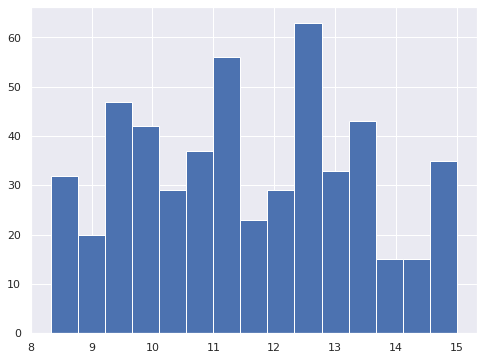

In [ ]:
plt.hist(df3.averageG, bins = 15)


We can see that the distribution of **averageG** is almost normal.


In [ ]:
df3.health.describe()

count    519.000000
mean       3.595376
std        1.413551
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

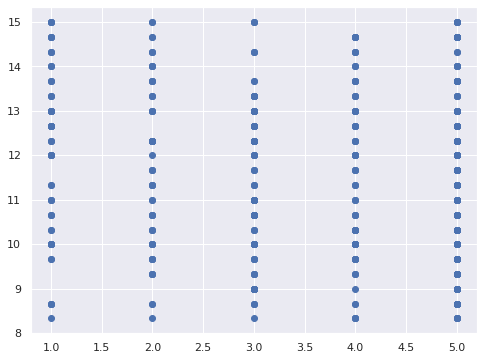

In [ ]:
plt.plot(df3.health,df3.averageG,'o')

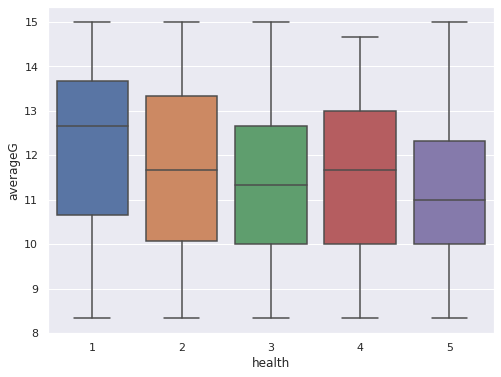

In [ ]:
sns.boxplot(x = df3.health,
            y = df3.averageG)

**health** has no observable impact on **averageG**.

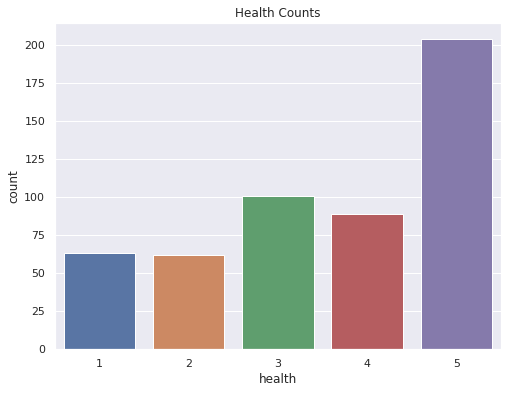

In [ ]:
sns.countplot(x =df3.health, data = df3)
insert_labels_title(title='Health Counts')

Most students have decent **health** conditions.

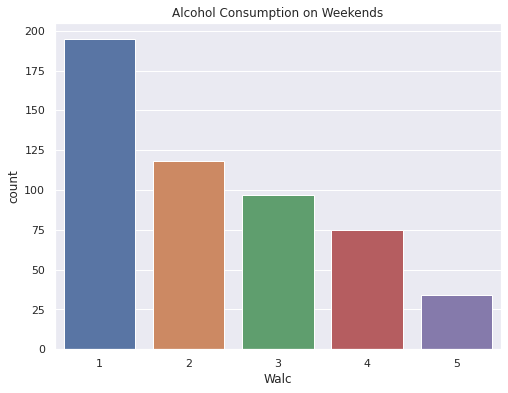

In [ ]:
sns.countplot(x =df3.Walc, data = df3)
insert_labels_title(title='Alcohol Consumption on Weekends')

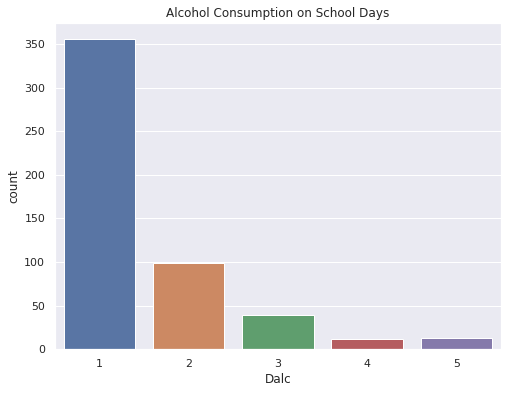

In [ ]:
sns.countplot(x =df3.Dalc, data = df3)
insert_labels_title(title='Alcohol Consumption on School Days')



Most students consume very low alcohol during school days and weekends. But students consume more on weekends.



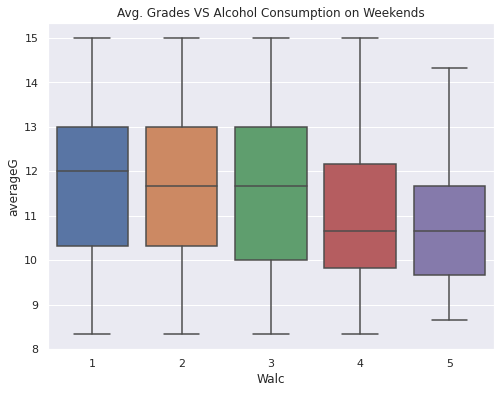

In [ ]:
sns.boxplot(x = df3.Walc,
            y = df3.averageG)
insert_labels_title(title='Avg. Grades VS Alcohol Consumption on Weekends')

Alcohol have a noticeable impact on averageG.

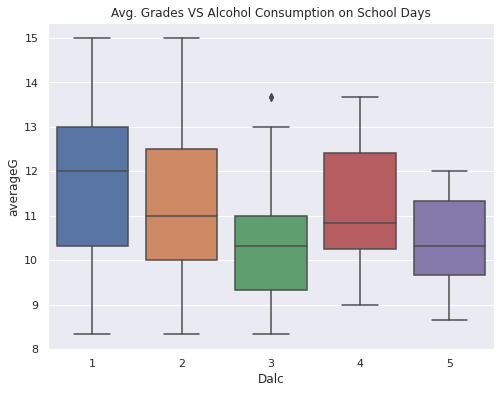

In [ ]:
sns.boxplot(x = df3.Dalc,
            y = df3.averageG)
insert_labels_title(title='Avg. Grades VS Alcohol Consumption on School Days')

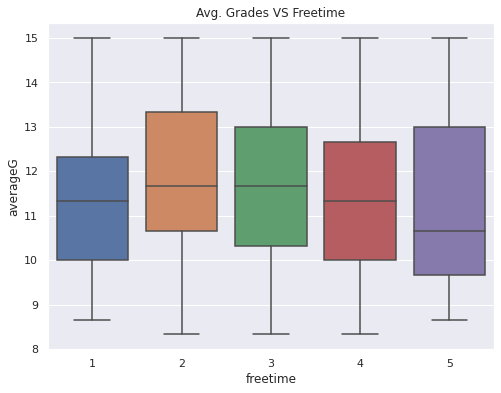

In [ ]:
sns.boxplot(x = df3.freetime,
            y = df3.averageG)
insert_labels_title(title='Avg. Grades VS Freetime')

We can see that as **freetime** increases **averageG** decreases. Except when **freetime** is very low, which makes sense.

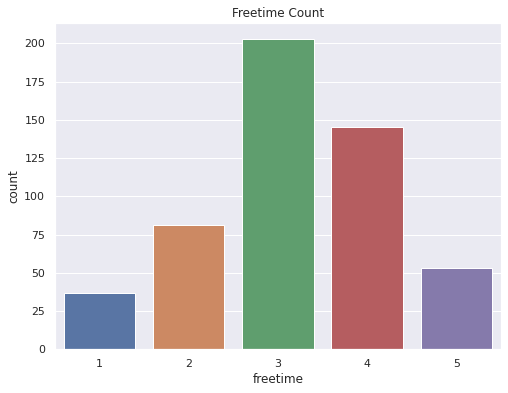

In [ ]:
sns.countplot(x =df3.freetime, data = df3)
insert_labels_title(title='Freetime Count')

Most students have a moderate **freetime**.

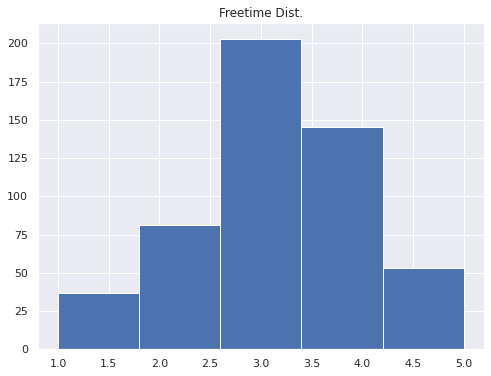

In [ ]:
plt.hist(df3.freetime, bins = 5)
insert_labels_title(title='Freetime Dist.')

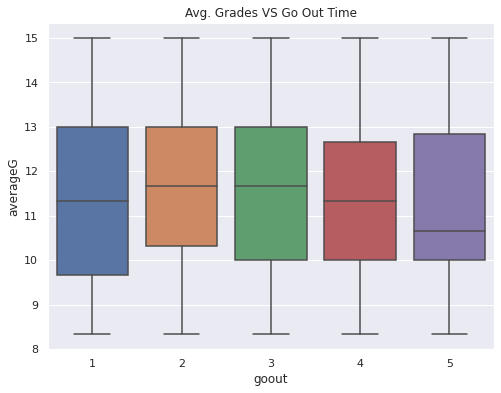

In [ ]:
sns.boxplot(x = df3.goout,
            y = df3.averageG)
insert_labels_title(title='Avg. Grades VS Go Out Time')

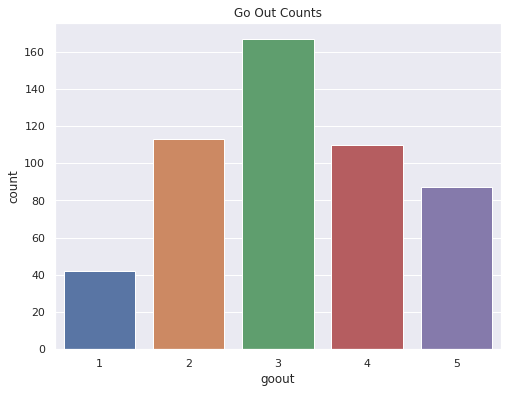

In [ ]:
sns.countplot(x =df3.goout, data = df3)
insert_labels_title(title='Go Out Counts')

Most students have a moderate **goout** time.

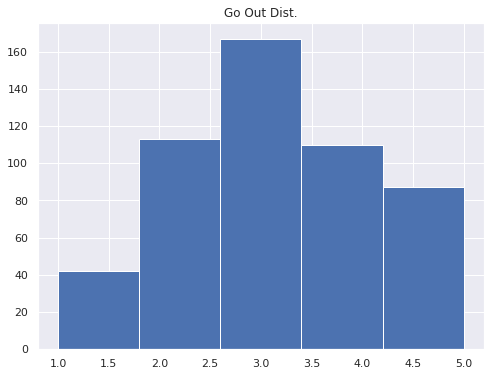

In [ ]:
plt.hist(df3.goout, bins = 5)
insert_labels_title(title='Go Out Dist.')

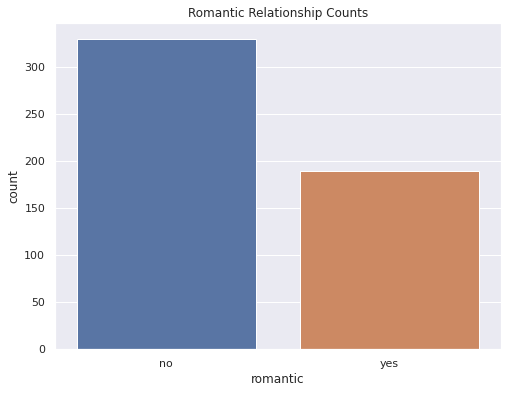

In [ ]:
sns.countplot(x =df3.romantic, data = df3)
insert_labels_title(title='Romantic Relationship Counts')

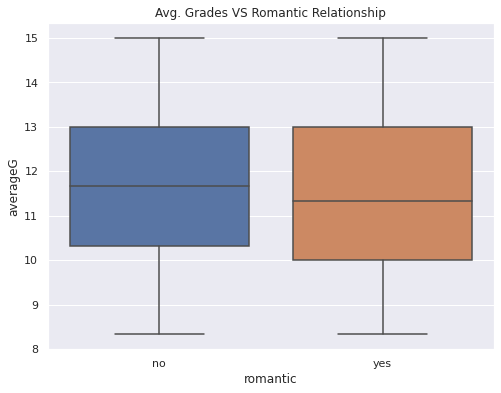

In [ ]:
sns.boxplot(x = df3.romantic,
            y = df3.averageG)
insert_labels_title(title='Avg. Grades VS Romantic Relationship')

Romantic relationships have no effect on **averageG**.

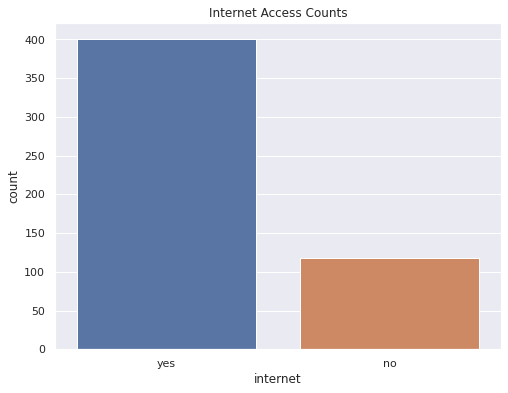

In [ ]:
sns.countplot(x =df3.internet, data = df3)
insert_labels_title(title='Internet Access Counts')

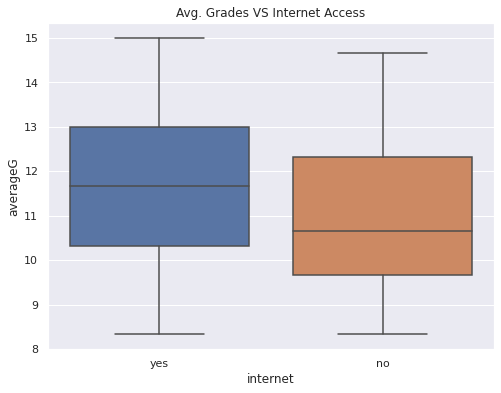

In [ ]:
sns.boxplot(x = df3.internet,
            y = df3.averageG)
insert_labels_title(title='Avg. Grades VS Internet Access')

Students with no internet access have a worse **averageG**.

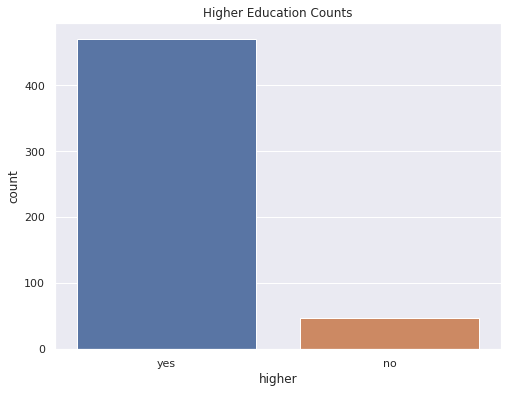

In [ ]:
sns.countplot(x =df3.higher, data = df3)
insert_labels_title(title='Higher Education Counts')

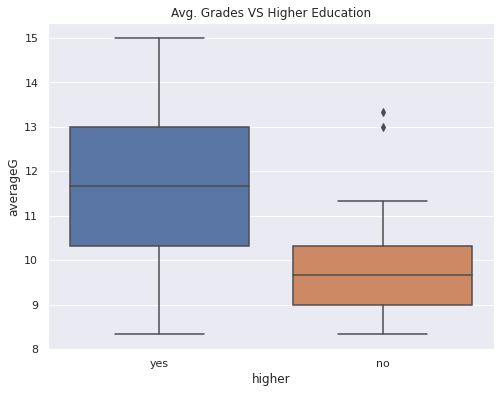

In [ ]:
sns.boxplot(x = df3.higher,
            y = df3.averageG)
insert_labels_title(title='Avg. Grades VS Higher Education')

Students who do not wish to go to college have lower **averageG**.

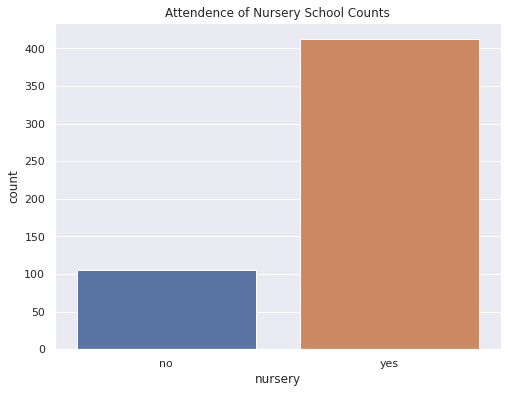

In [ ]:
sns.countplot(x =df3.nursery, data = df3)
insert_labels_title(title='Attendence of Nursery School Counts')

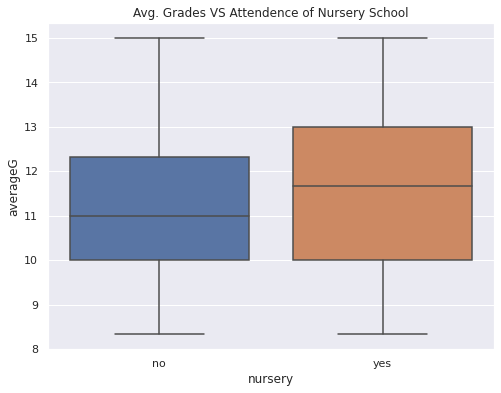

In [ ]:
sns.boxplot(x = df3.nursery,
            y = df3.averageG)
insert_labels_title(title='Avg. Grades VS Attendence of Nursery School')

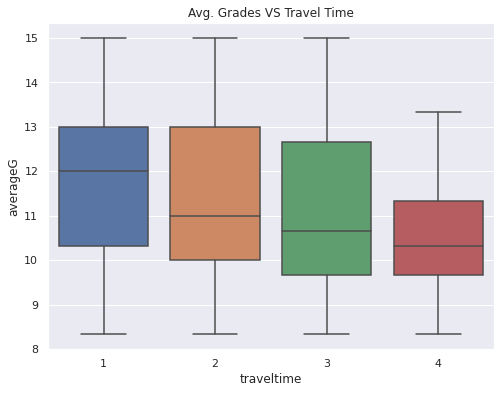

In [ ]:
sns.boxplot(x = df3.traveltime,
            y = df3.averageG)
insert_labels_title(title='Avg. Grades VS Travel Time')

The time from home to school has a strong effect on students performance!

---



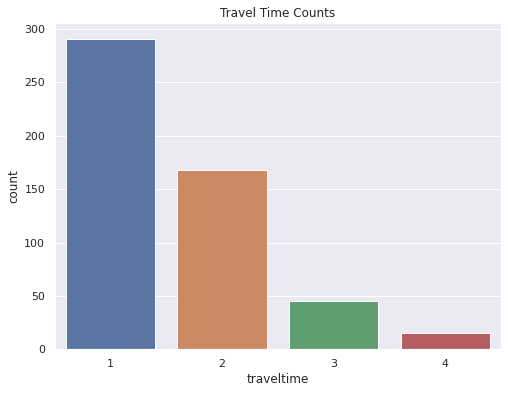

In [ ]:
sns.countplot(x =df3.traveltime, data = df3)
insert_labels_title(title='Travel Time Counts')

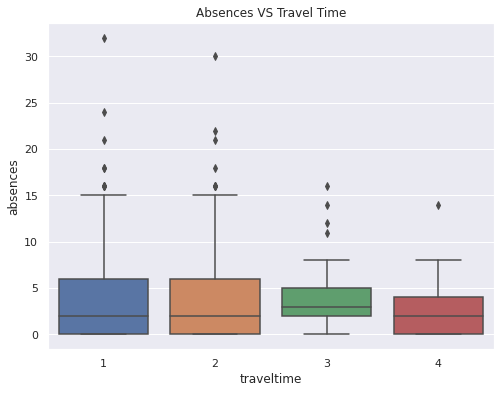

In [ ]:
sns.boxplot(x = df3.traveltime,
            y = df3.absences)
insert_labels_title(title='Absences VS Travel Time')

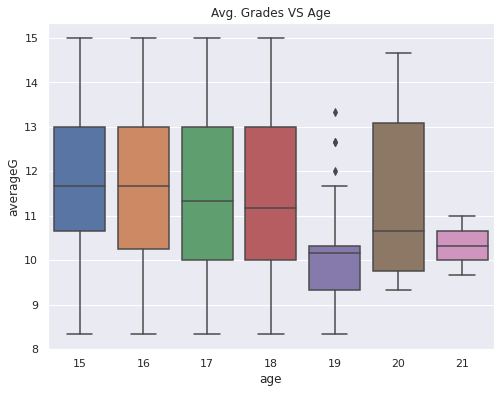

In [ ]:
sns.boxplot(x = df3.age,
            y = df3.averageG)
insert_labels_title(title='Avg. Grades VS Age')

Older students have worse performance, wihch is expected since they repeated years.

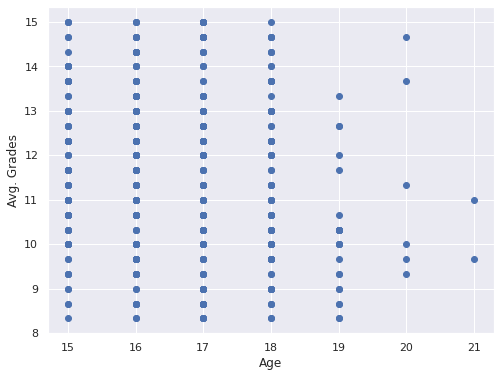

In [ ]:
plt.plot(df3.age,df3.averageG,'o')
insert_labels_title(xlabel='Age',ylabel='Avg. Grades')

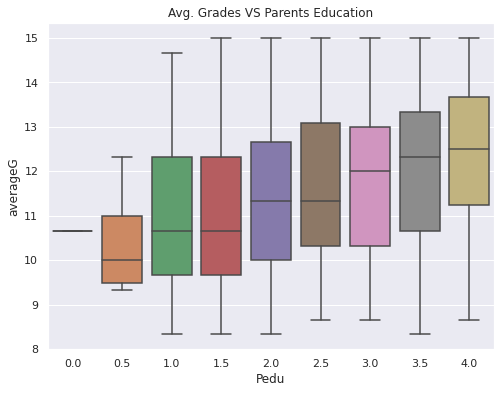

In [ ]:
sns.boxplot(x = df3.Pedu,
            y = df3.averageG)
insert_labels_title(title='Avg. Grades VS Parents Education')

Parents education have a positive correlation with averageG.

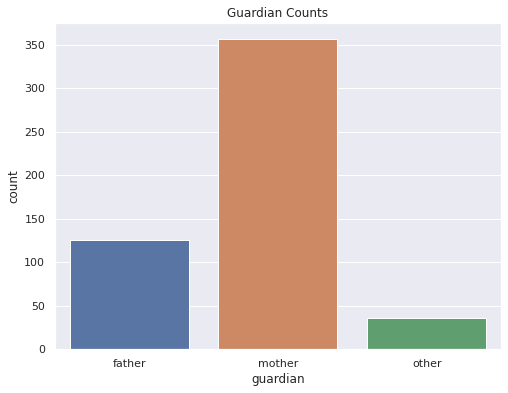

In [ ]:
sns.countplot(x =df3.guardian, data = df3)
insert_labels_title(title='Guardian Counts')

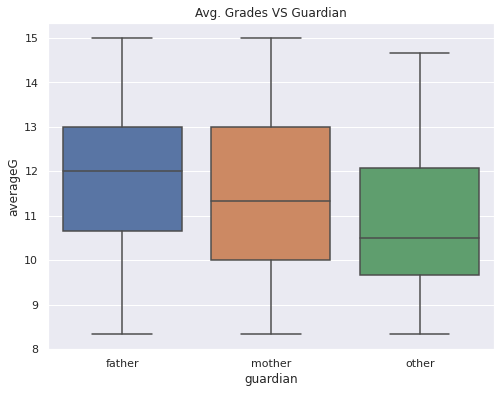

In [ ]:
sns.boxplot(x = df3.guardian,
            y = df3.averageG)
insert_labels_title(title='Avg. Grades VS Guardian')

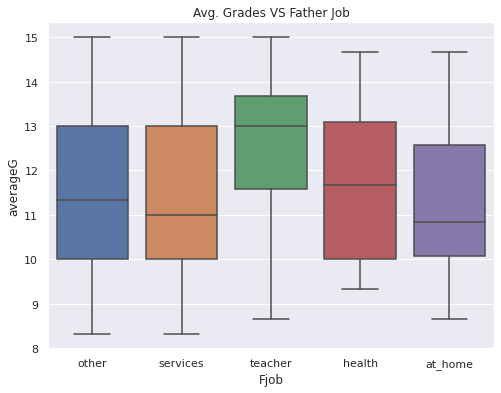

In [ ]:
sns.boxplot(x = df3.Fjob,
            y = df3.averageG)
insert_labels_title(title='Avg. Grades VS Father Job')

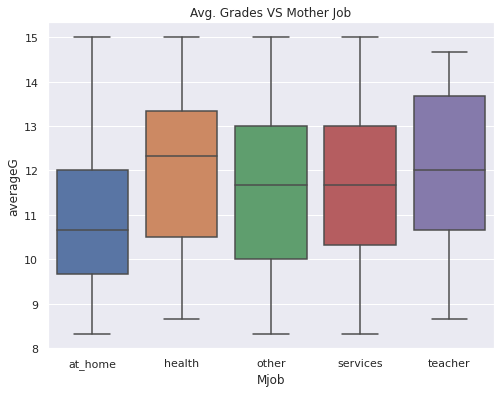

In [ ]:
sns.boxplot(x = df3.Mjob,
            y = df3.averageG)
insert_labels_title(title='Avg. Grades VS Mother Job')

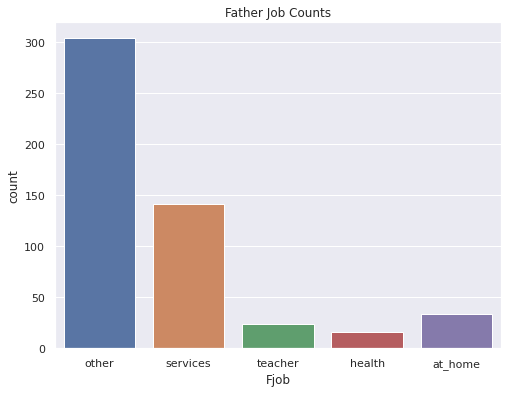

In [ ]:
sns.countplot(x =df3.Fjob, data = df3)
insert_labels_title(title='Father Job Counts')

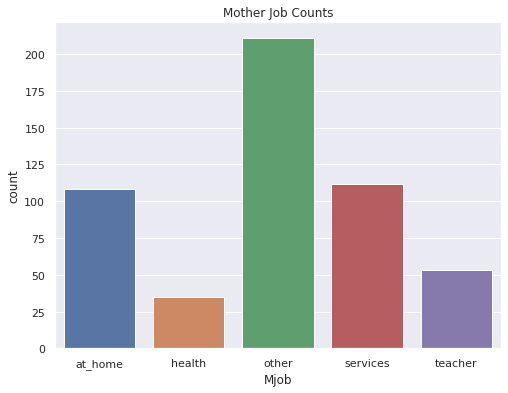

In [ ]:
sns.countplot(x =df3.Mjob, data = df3)
insert_labels_title(title='Mother Job Counts')

In [ ]:
df3.Mjob.describe()

count       519
unique        5
top       other
freq        211
Name: Mjob, dtype: object

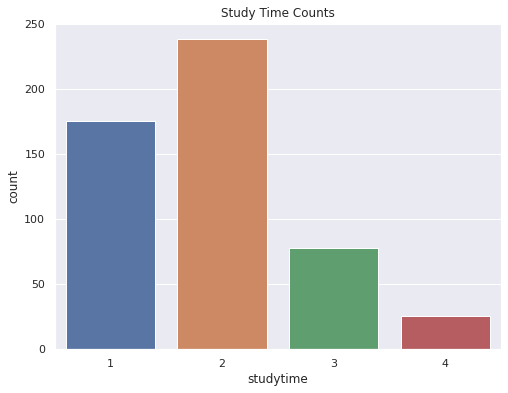

In [ ]:
sns.countplot(x =df3.studytime, data = df3)
insert_labels_title(title='Study Time Counts')

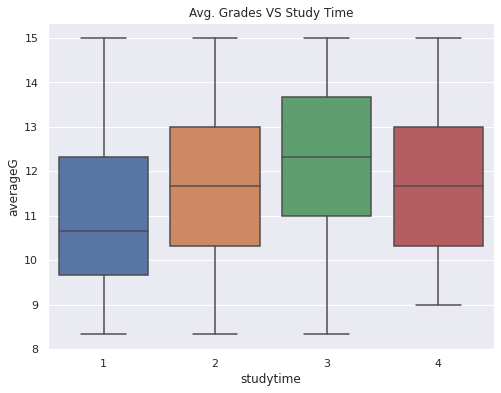

In [ ]:
sns.boxplot(x = df3.studytime,
            y = df3.averageG)
insert_labels_title(title='Avg. Grades VS Study Time')

Interestingly, so higher studytime does not mean higher grades.

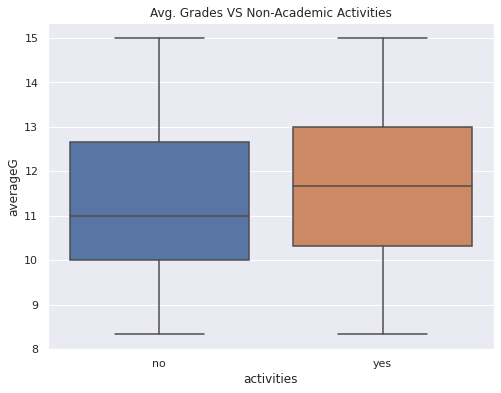

In [ ]:
sns.boxplot(x = df3.activities,
            y = df3.averageG)
insert_labels_title(title='Avg. Grades VS Non-Academic Activities')

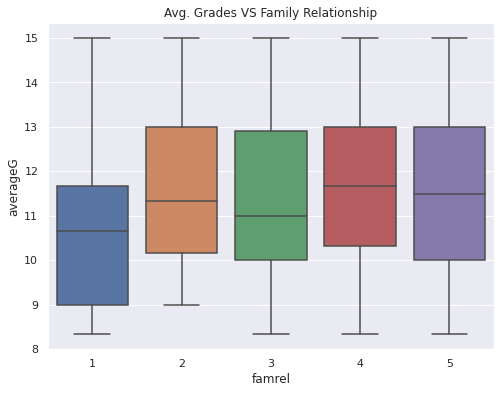

In [ ]:
sns.boxplot(x = df3.famrel,
            y = df3.averageG)
insert_labels_title(title='Avg. Grades VS Family Relationship')

Poor family relation affects the grades adversely.

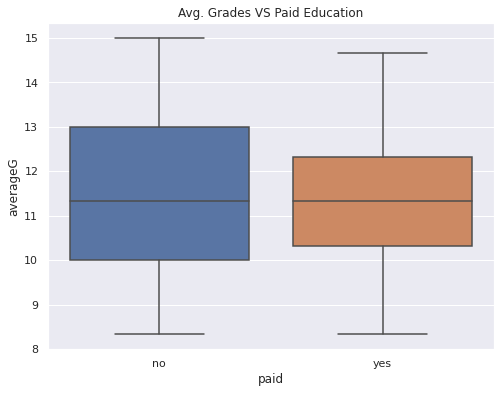

In [ ]:
sns.boxplot(x = df3.paid,
            y = df3.averageG)
insert_labels_title(title='Avg. Grades VS Paid Education')

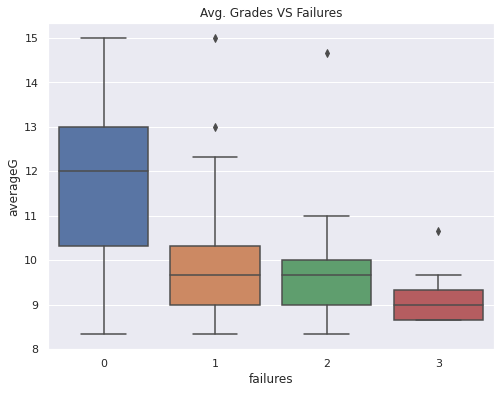

In [ ]:
sns.boxplot(x = df3.failures,
            y = df3.averageG)
insert_labels_title(title='Avg. Grades VS Failures')

As expected, students who repeat the course have lower **averageG**.

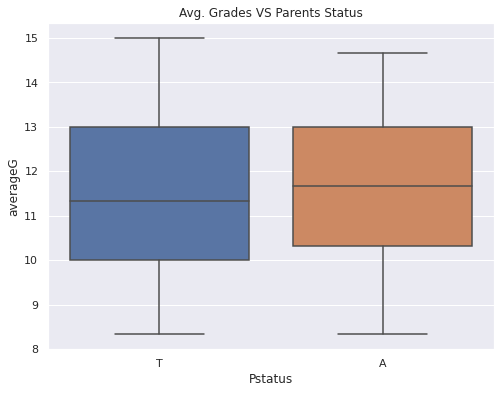

In [ ]:
sns.boxplot(x = df3.Pstatus,
            y = df3.averageG)
insert_labels_title(title='Avg. Grades VS Parents Status')

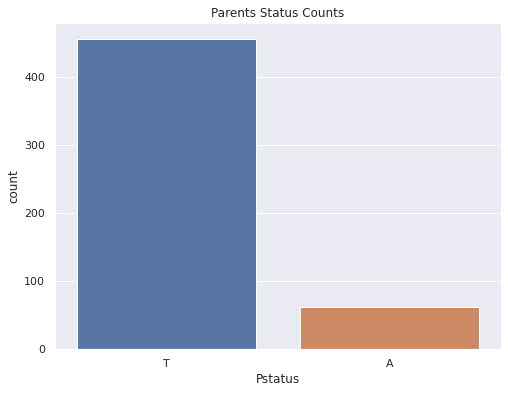

In [ ]:
sns.countplot(x =df3.Pstatus, data = df3)
insert_labels_title(title='Parents Status Counts')

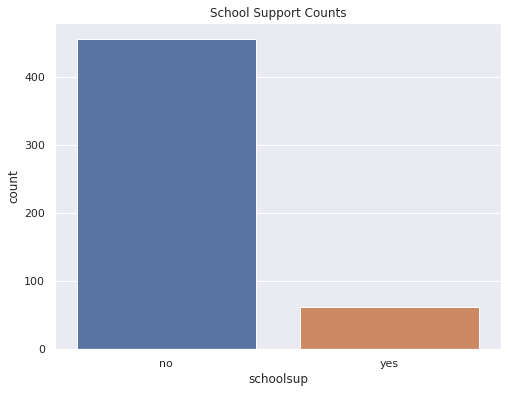

In [ ]:
sns.countplot(x =df3.schoolsup, data = df3)
insert_labels_title(title='School Support Counts')

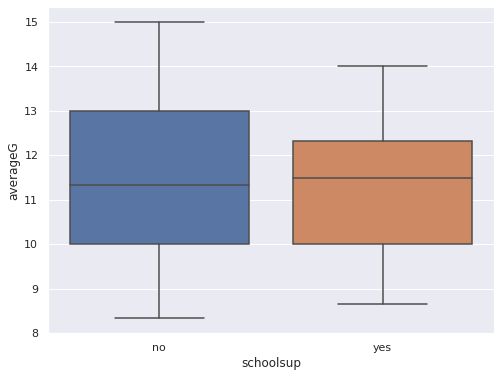

In [ ]:
sns.boxplot(x = df3.schoolsup,
            y = df3.averageG)


The school support (help sessions) are improving the students performance.

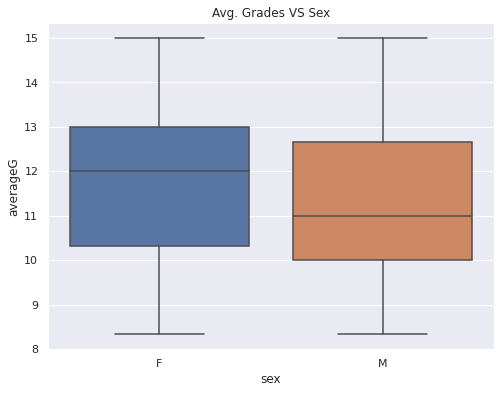

In [ ]:
sns.boxplot(x = df3.sex,
            y = df3.averageG)
insert_labels_title(title='Avg. Grades VS Sex')

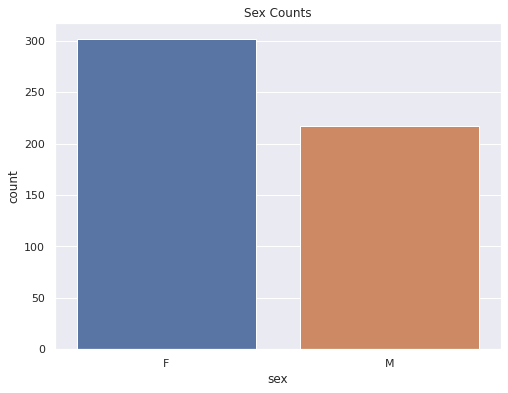

In [ ]:
sns.countplot(x =df3.sex, data = df3)
insert_labels_title(title='Sex Counts')

Fmale students have higher grades.

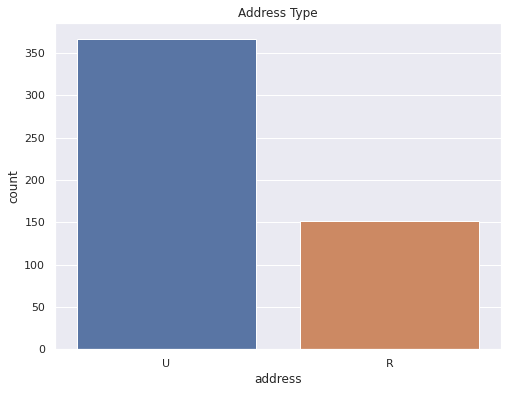

In [ ]:
sns.countplot(x =df3.address, data = df3)
insert_labels_title(title='Address Type')

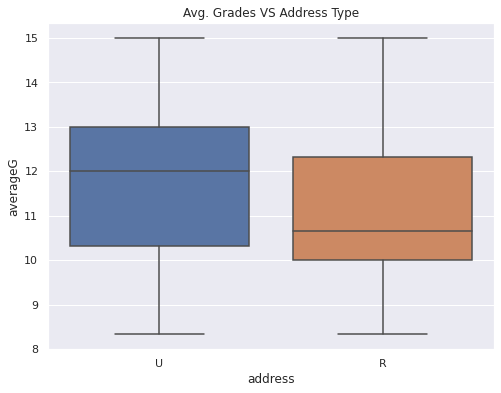

In [ ]:
sns.boxplot(x = df3.address,
            y = df3.averageG)
insert_labels_title(title='Avg. Grades VS Address Type')

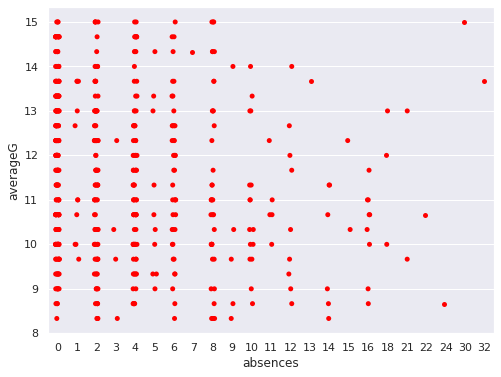

In [ ]:
# To check the dist. of points
sns.stripplot(data = df3, x = df3.absences, y = df3.averageG,color='red');

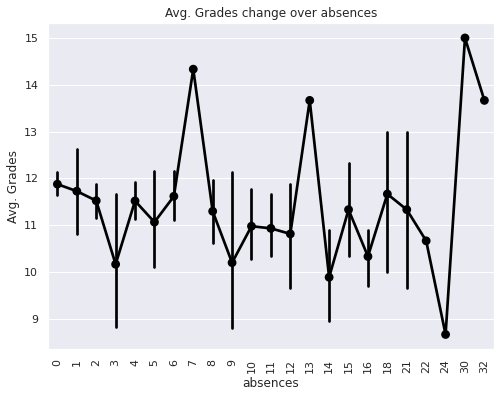

In [ ]:
# Plotting a time based graph
sns.pointplot(data=df3, x='absences', y='averageG', color='black')
plt.xticks(rotation=90)
# Polishing the graph
plt.title('Avg. Grades change over absences')
plt.ylabel('Avg. Grades');

Outliers 

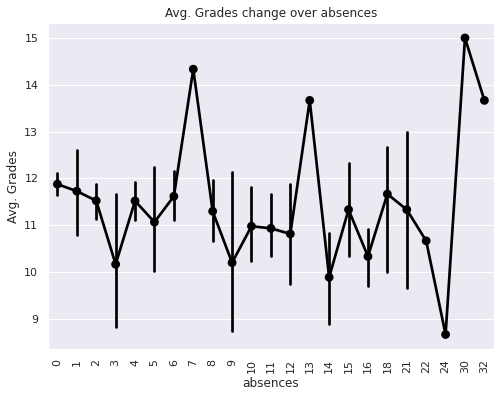

In [ ]:
# Plotting a time based graph
sns.pointplot(data=df3, x='absences', y='averageG', color='black')
plt.xticks(rotation=90)
# Polishing the graph
plt.title('Avg. Grades change over absences')
plt.ylabel('Avg. Grades');

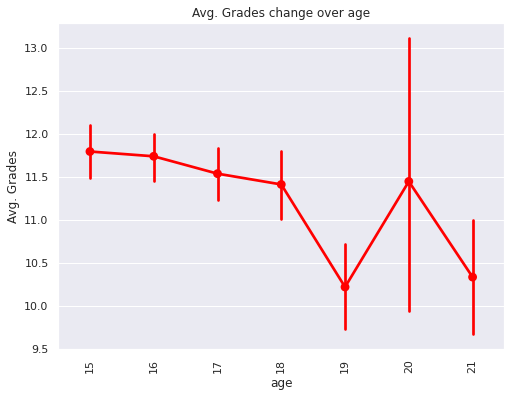

In [ ]:
# Plotting a time based graph
sns.pointplot(data=df3, x='age', y='averageG', color='red')
plt.xticks(rotation=90)
# Polishing the graph
plt.title('Avg. Grades change over age')
plt.ylabel('Avg. Grades');

As shown previously, younger students are likely to perform better.

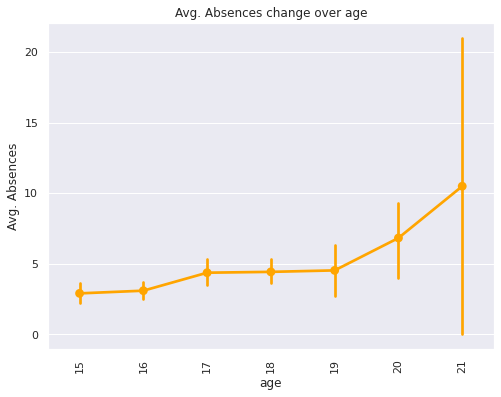

In [ ]:
# Plotting a time based graph
sns.pointplot(data=df3, x='age', y='absences', color='orange')
plt.xticks(rotation=90)
# Polishing the graph
plt.title('Avg. Absences change over age')
plt.ylabel('Avg. Absences');

Also, older students will miss more classes compared to younger students.

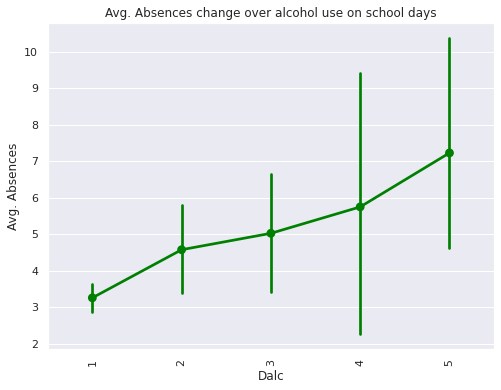

In [ ]:
# Plotting a time based graph
sns.pointplot(data=df3, x='Dalc', y='absences', color='green')
plt.xticks(rotation=90)
# Polishing the graph
plt.title('Avg. Absences change over alcohol use on school days')
plt.ylabel('Avg. Absences');

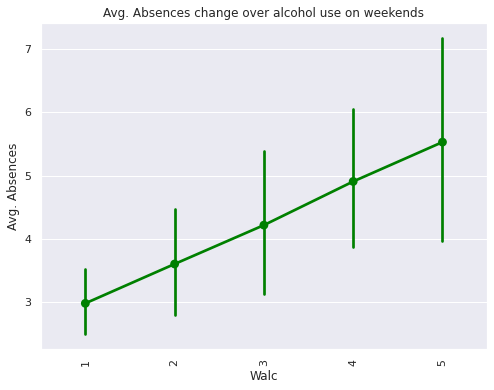

In [ ]:
# Plotting a time based graph
sns.pointplot(data=df3, x='Walc', y='absences', color='green')
plt.xticks(rotation=90)
# Polishing the graph
plt.title('Avg. Absences change over alcohol use on weekends')
plt.ylabel('Avg. Absences');

Alcohol is affecting the attendance of the students.

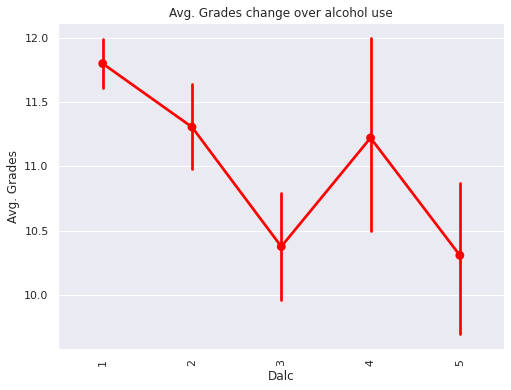

In [ ]:
# Plotting a time based graph
sns.pointplot(data=df3, x='Dalc', y='averageG', color='red')
plt.xticks(rotation=90)
# Polishing the graph
plt.title('Avg. Grades change over alcohol use')
plt.ylabel('Avg. Grades');

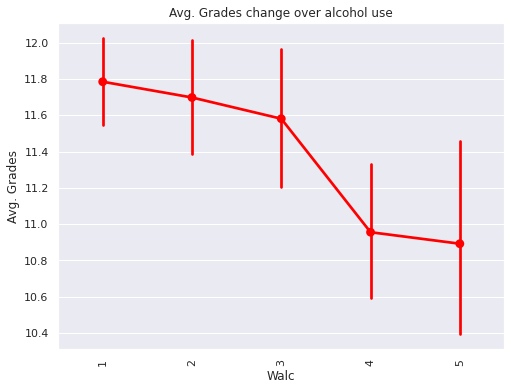

In [ ]:
# Plotting a time based graph
sns.pointplot(data=df3, x='Walc', y='averageG', color='red')
plt.xticks(rotation=90)
# Polishing the graph
plt.title('Avg. Grades change over alcohol use')
plt.ylabel('Avg. Grades');

Excessive alcohol is affecting the performance of the students.

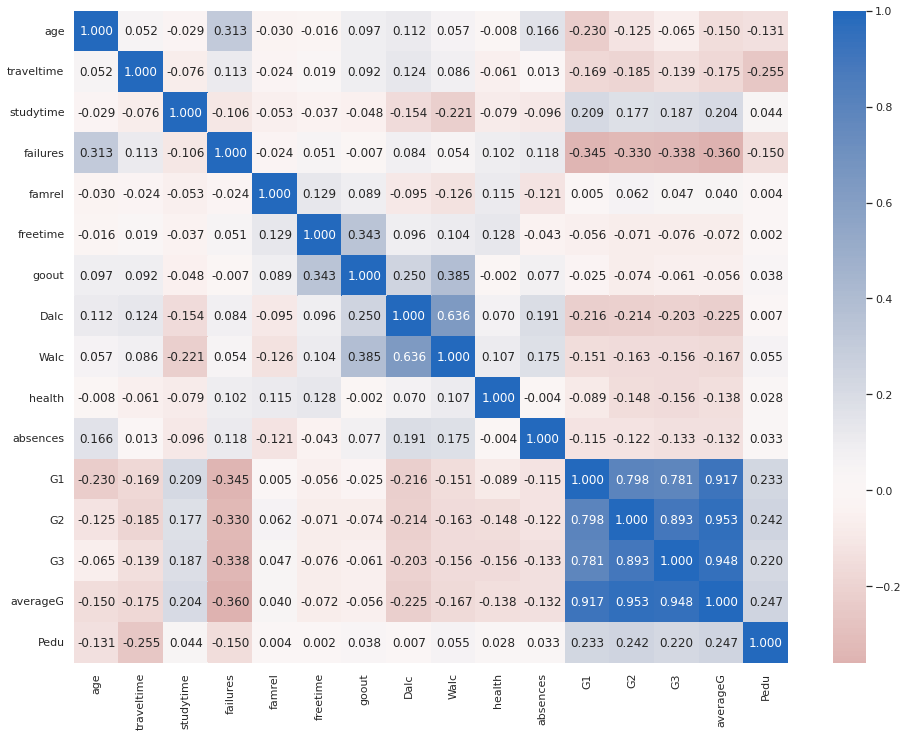

In [ ]:
# Checking the correlations between num_vars
numeric_cols = df3.columns
plt.figure(figsize = [16, 12])
sns.heatmap(df3[numeric_cols].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.show()


We can observe that **failures**, **Pedu**, **Dalc** and **studytime** are the varibles that have a significant correlation with **averageG**.

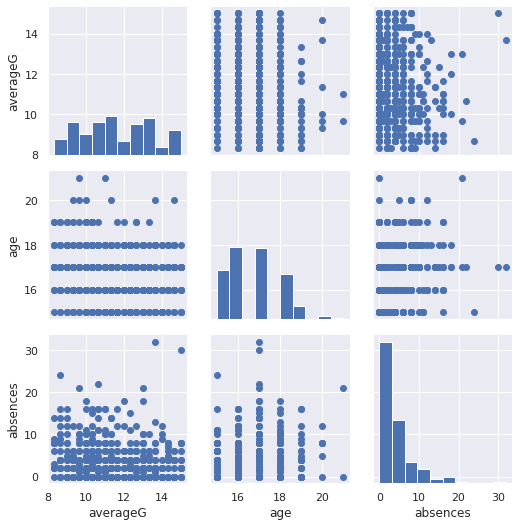

In [ ]:
# Checking how num_vars interact with each other
g = sns.PairGrid(data = df3, vars = ['averageG','age','absences'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

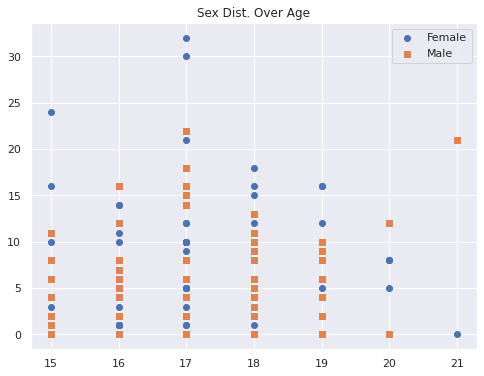

In [ ]:
# Most common genres
cat_markers = [['F', 'o'],['M', 's']]

# To loop thro the cat_markers and plot each marker
for cat, marker in cat_markers:
    df_cat = df3[df3['sex'] == cat]
    plt.scatter(data = df_cat, x = 'age', y = 'absences', marker = marker)
insert_labels_title(title='Sex Dist. Over Age',legends=['Female','Male'])

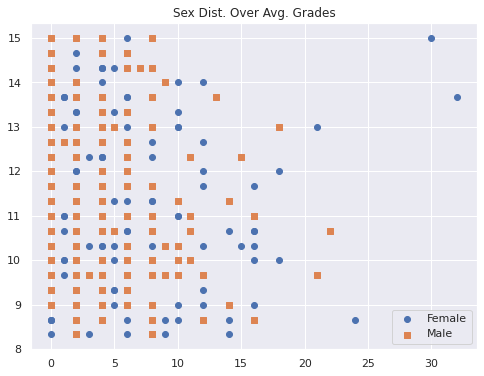

In [ ]:
# Most common genres
cat_markers = [['F', 'o'],['M', 's']]

# To loop thro the cat_markers and plot each marker
for cat, marker in cat_markers:
    df_cat = df3[df3['sex'] == cat]
    plt.scatter(data = df_cat, x = 'absences', y = 'averageG', marker = marker)

insert_labels_title(title='Sex Dist. Over Avg. Grades',legends=['Female','Male'])

# Detailed Analysis:

## Male vs Female comparison 



In [ ]:
df_female = df3[df3.sex == 'F']
df_female.describe()

,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,averageG,Pedu
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,16.698675,1.533113,2.046358,0.158940,3.847682,3.069536,3.112583,1.298013,1.960265,3.400662,3.900662,11.473510,11.649007,12.135762,11.752759,2.258278
std,1.200193,0.727187,0.788941,0.469576,0.996661,1.004210,1.195468,0.675088,1.083741,1.461033,4.905424,1.972644,1.839755,1.918119,1.786279,0.990577
min,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,6.000000,8.000000,8.000000,8.333333,0.000000
25%,16.000000,1.000000,2.000000,0.000000,3.000000,2.250000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,11.000000,10.333333,1.500000
50%,17.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,12.000000,12.000000,12.000000,2.000000
75%,17.000000,2.000000,2.000000,0.000000,4.000000,4.000000,4.000000,1.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,13.000000,3.000000
max,21.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,15.000000,16.000000,16.000000,15.000000,4.000000


In [ ]:
df_male = df3[df3.sex == 'M']
df_male.describe()

,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,averageG,Pedu
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,16.589862,1.654378,1.723502,0.225806,4.023041,3.345622,3.244240,1.806452,2.764977,3.866359,3.654378,10.986175,11.184332,11.622120,11.264209,2.550691
std,1.248143,0.819548,0.842753,0.623370,0.878985,1.086701,1.162802,1.109452,1.389467,1.300150,4.297436,1.916013,1.849207,1.884407,1.775413,1.019355
min,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,6.000000,7.000000,8.000000,8.333333,0.500000
25%,16.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,10.000000,10.000000,10.000000,10.000000,1.500000
50%,16.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,3.000000,4.000000,2.000000,11.000000,11.000000,11.000000,11.000000,2.500000
75%,17.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,4.000000,5.000000,6.000000,12.000000,13.000000,13.000000,12.666667,3.500000
max,21.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,22.000000,16.000000,15.000000,16.000000,15.000000,4.000000


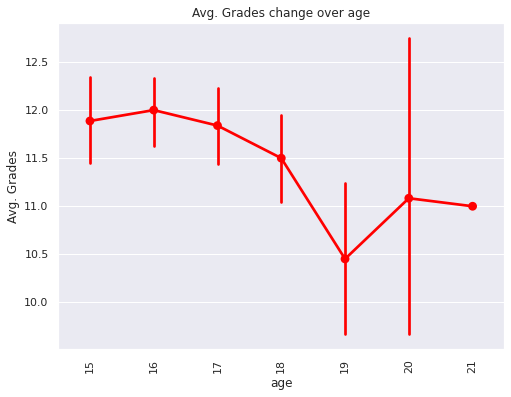

In [ ]:
# Plotting a time based graph
sns.pointplot(data=df_female, x='age', y='averageG', color='red')
plt.xticks(rotation=90)
# Polishing the graph
plt.title('Avg. Grades change over age')
plt.ylabel('Avg. Grades');

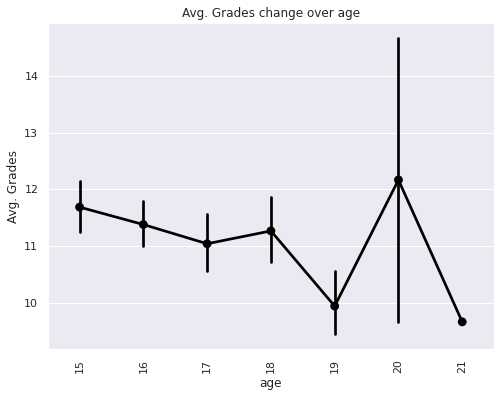

In [ ]:
# Plotting a time based graph
sns.pointplot(data=df_male, x='age', y='averageG', color='black')
plt.xticks(rotation=90)
# Polishing the graph
plt.title('Avg. Grades change over age')
plt.ylabel('Avg. Grades');

## High absences students vs low absences students

In [ ]:
df_high_absences = df3[df3.absences > 5]
df_high_absences.describe()

,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,averageG,Pedu
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,16.929577,1.570423,1.816901,0.260563,3.704225,3.077465,3.345070,1.732394,2.697183,3.633803,9.859155,10.971831,11.133803,11.549296,11.218310,2.376761
std,1.297285,0.728331,0.830447,0.626592,1.063840,1.072374,1.208984,1.123037,1.373454,1.396444,4.610490,2.006881,1.880202,2.002047,1.832224,0.956847
min,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,7.000000,8.000000,8.000000,8.333333,1.000000
25%,16.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,1.000000,1.000000,3.000000,6.000000,10.000000,10.000000,10.000000,10.000000,1.500000
50%,17.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,3.000000,4.000000,8.000000,11.000000,11.000000,11.000000,11.000000,2.000000
75%,18.000000,2.000000,2.000000,0.000000,4.000000,4.000000,4.000000,2.000000,4.000000,5.000000,11.750000,12.000000,12.000000,13.000000,12.666667,3.000000
max,21.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,16.000000,15.000000,16.000000,15.000000,4.000000


In [ ]:
df_low_absences = df3[df3.absences <= 5]
df_low_absences.describe()

,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,averageG,Pedu
count,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000
mean,16.549072,1.588859,1.946950,0.159151,4.002653,3.225464,3.100796,1.427056,2.145889,3.580902,1.514589,11.381963,11.575597,12.061008,11.672856,2.381963
std,1.175257,0.784276,0.823425,0.501198,0.894721,1.036355,1.167113,0.812541,1.214908,1.421513,1.679167,1.935803,1.835014,1.870542,1.769093,1.033350
min,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,6.000000,7.000000,8.000000,8.333333,0.000000
25%,16.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,11.000000,10.000000,1.500000
50%,16.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,1.000000,11.000000,12.000000,12.000000,11.666667,2.000000
75%,17.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,2.000000,13.000000,13.000000,13.000000,13.000000,3.500000
max,21.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,15.000000,16.000000,16.000000,15.000000,4.000000


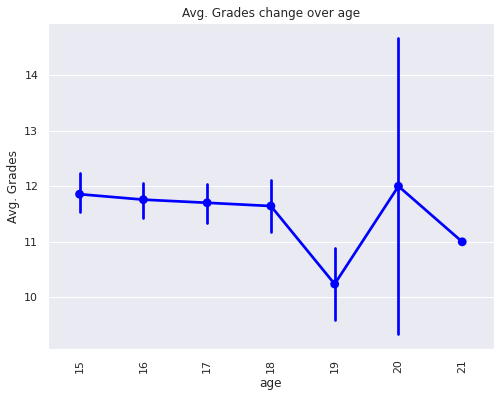

In [ ]:
# Plotting a time based graph
sns.pointplot(data=df_low_absences, x='age', y='averageG', color='blue')
plt.xticks(rotation=90)
# Polishing the graph
plt.title('Avg. Grades change over age')
plt.ylabel('Avg. Grades');

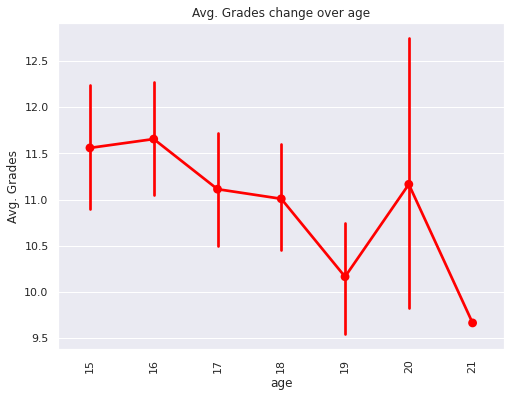

In [ ]:
# Plotting a time based graph
sns.pointplot(data=df_high_absences, x='age', y='averageG', color='red')
plt.xticks(rotation=90)
# Polishing the graph
plt.title('Avg. Grades change over age')
plt.ylabel('Avg. Grades');

## Alcoholic vs non-alcoholic students

In [ ]:
df_low_Dalc = df3[df3.Dalc <= 3]
df_low_Dalc.describe()

,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,averageG,Pedu
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.00000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,16.615385,1.566802,1.925101,0.180162,3.931174,3.176113,3.123482,1.35830,2.194332,3.589069,3.659919,11.315789,11.497976,11.953441,11.589069,2.382591
std,1.202535,0.749977,0.825836,0.527087,0.942204,1.034573,1.173981,0.62338,1.204576,1.423920,4.550119,1.967658,1.872995,1.924503,1.808017,1.009780
min,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,6.000000,7.000000,8.000000,8.333333,0.000000
25%,16.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.00000,1.000000,3.000000,0.000000,10.000000,10.000000,10.000000,10.000000,1.500000
50%,17.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.00000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000,11.666667,2.000000
75%,17.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.00000,3.000000,5.000000,6.000000,13.000000,13.000000,13.000000,13.000000,3.000000
max,21.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,3.00000,5.000000,5.000000,32.000000,16.000000,16.000000,16.000000,15.000000,4.000000


In [ ]:
df_high_Dalc = df3[df3.Dalc > 3]
df_high_Dalc.describe()

,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,averageG,Pedu
count,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000
mean,17.400000,1.920000,1.64000,0.320000,3.720000,3.360000,4.040000,4.520000,4.32000,3.720000,6.520000,10.360000,10.600000,11.280000,10.746667,2.34000
std,1.354006,1.037625,0.81035,0.748331,1.137248,1.287116,1.019804,0.509902,1.10755,1.208305,5.909879,1.629928,1.224745,1.720465,1.337770,1.07742
min,15.000000,1.000000,1.00000,0.000000,1.000000,1.000000,2.000000,4.000000,1.00000,1.000000,0.000000,7.000000,8.000000,8.000000,8.666667,1.00000
25%,17.000000,1.000000,1.00000,0.000000,3.000000,3.000000,3.000000,4.000000,4.00000,3.000000,2.000000,9.000000,10.000000,10.000000,10.000000,1.50000
50%,17.000000,2.000000,1.00000,0.000000,4.000000,3.000000,4.000000,5.000000,5.00000,4.000000,5.000000,10.000000,10.000000,11.000000,10.666667,2.00000
75%,18.000000,2.000000,2.00000,0.000000,4.000000,4.000000,5.000000,5.000000,5.00000,5.000000,10.000000,11.000000,11.000000,12.000000,11.666667,3.00000
max,21.000000,4.000000,4.00000,3.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,21.000000,13.000000,14.000000,16.000000,13.666667,4.00000


In [ ]:
df_low_Walc = df3[df3.Walc <= 3]
df_low_Walc.describe()

,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,averageG,Pedu
count,410.000000,410.000000,410.00000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000
mean,16.621951,1.553659,2.00000,0.175610,3.965854,3.131707,2.963415,1.246341,1.760976,3.517073,3.451220,11.439024,11.612195,12.082927,11.711382,2.351220
std,1.231615,0.738927,0.81849,0.531078,0.929708,1.040603,1.125880,0.581120,0.810348,1.436837,4.526349,1.969806,1.877247,1.915820,1.808971,0.997459
min,15.000000,1.000000,1.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,6.000000,7.000000,8.000000,8.333333,0.000000
25%,16.000000,1.000000,1.00000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,11.000000,10.333333,1.500000
50%,17.000000,1.000000,2.00000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,12.000000,12.000000,11.833333,2.000000
75%,17.000000,2.000000,2.00000,0.000000,5.000000,4.000000,4.000000,1.000000,2.000000,5.000000,5.000000,13.000000,13.000000,14.000000,13.000000,3.000000
max,21.000000,4.000000,4.00000,3.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,32.000000,16.000000,16.000000,16.000000,15.000000,4.000000


In [ ]:
df_low_Walc = df3[df3.Walc > 3]
df_low_Walc.describe()

,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,averageG,Pedu
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,16.770642,1.697248,1.577982,0.229358,3.752294,3.385321,3.935780,2.504587,4.311927,3.889908,5.100917,10.633028,10.862385,11.311927,10.935780,2.490826
std,1.175625,0.866074,0.773323,0.571435,1.019767,1.053286,1.073892,1.221898,0.465420,1.286248,4.930902,1.803600,1.652540,1.814026,1.613649,1.062800
min,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,0.000000,7.000000,8.000000,8.000000,8.333333,0.500000
25%,16.000000,1.000000,1.000000,0.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,1.000000,9.000000,10.000000,10.000000,9.666667,1.500000
50%,17.000000,1.000000,1.000000,0.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,10.000000,11.000000,11.000000,10.666667,2.500000
75%,18.000000,2.000000,2.000000,0.000000,4.000000,4.000000,5.000000,3.000000,5.000000,5.000000,8.000000,12.000000,12.000000,12.000000,12.000000,3.500000
max,20.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,22.000000,15.000000,16.000000,16.000000,15.000000,4.000000


## Students in relationship vs students with no relationship

In [ ]:
df_relation = df3[df3.romantic == 'yes']
df_relation.describe()

,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,averageG,Pedu
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,16.941799,1.576720,1.941799,0.222222,3.873016,3.206349,3.164021,1.518519,2.179894,3.539683,4.317460,11.079365,11.306878,11.809524,11.398589,2.322751
std,1.263985,0.765401,0.779934,0.586491,1.013086,1.033874,1.237524,0.965317,1.241746,1.456739,5.184342,2.013002,1.916059,2.035774,1.863193,1.028354
min,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,7.000000,7.000000,8.000000,8.333333,0.500000
25%,16.000000,1.000000,1.000000,0.000000,3.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000,10.000000,1.500000
50%,17.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000,11.333333,2.000000
75%,18.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,13.000000,13.000000,3.000000
max,21.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,15.000000,15.000000,16.000000,15.000000,4.000000


In [ ]:
df_single = df3[df3.romantic == 'no']
df_single.describe()

,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,averageG,Pedu
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,16.487879,1.587879,1.893939,0.166667,3.948485,3.172727,3.169697,1.506061,2.363636,3.627273,3.500000,11.378788,11.539394,11.984848,11.634343,2.413636
std,1.164901,0.771750,0.852830,0.510775,0.916124,1.056395,1.151841,0.889807,1.302749,1.389446,4.308224,1.926973,1.818503,1.849114,1.753936,1.002715
min,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,6.000000,8.000000,8.000000,8.333333,0.000000
25%,16.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,10.000000,10.000000,11.000000,10.333333,1.500000
50%,16.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000,11.666667,2.000000
75%,17.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,13.000000,13.000000,3.000000
max,21.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,30.000000,16.000000,16.000000,16.000000,15.000000,4.000000


## Parents together or apart

In [ ]:
df_t = df3[df3.Pstatus == 'T']
df_t.describe()

,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,averageG,Pedu
count,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,16.660832,1.599562,1.908096,0.188184,3.934354,3.199125,3.190372,1.516411,2.330416,3.586433,3.577681,11.242888,11.435449,11.903720,11.527352,2.355580
std,1.219747,0.771931,0.830002,0.545750,0.927209,1.041759,1.190641,0.913023,1.279997,1.410204,4.387355,1.973531,1.854550,1.920437,1.799337,1.016819
min,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,6.000000,7.000000,8.000000,8.333333,0.000000
25%,16.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,10.000000,10.000000,10.000000,10.000000,1.500000
50%,17.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000,11.333333,2.000000
75%,17.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,13.000000,13.000000,3.000000
max,21.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,16.000000,16.000000,16.000000,15.000000,4.000000


In [ ]:
df_a = df3[df3.Pstatus == 'A']
df_a.describe()

,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,averageG,Pedu
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,16.596774,1.467742,1.935484,0.177419,3.822581,3.080645,3.0000,1.467742,2.048387,3.661290,5.419355,11.467742,11.596774,12.048387,11.704301,2.564516
std,1.234207,0.740353,0.807160,0.496684,1.123872,1.090922,1.1162,0.953299,1.285830,1.447933,6.109784,1.879290,1.877037,1.919934,1.780388,0.964467
min,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,0.000000,7.000000,8.000000,8.000000,8.333333,0.500000
25%,16.000000,1.000000,1.000000,0.000000,3.000000,3.000000,2.0000,1.000000,1.000000,3.000000,0.000000,10.000000,10.000000,10.250000,10.333333,2.000000
50%,17.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.0000,1.000000,1.500000,4.000000,4.000000,11.500000,11.500000,12.000000,11.666667,2.500000
75%,17.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.0000,1.750000,3.000000,5.000000,8.000000,13.000000,13.000000,13.750000,13.000000,3.500000
max,20.000000,4.000000,4.000000,2.000000,5.000000,5.000000,5.0000,5.000000,5.000000,5.000000,24.000000,15.000000,15.000000,16.000000,14.666667,4.000000


In [ ]:
data = np.asarray(df3)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 519 entries, 1 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      519 non-null    object 
 1   sex         519 non-null    object 
 2   age         519 non-null    int64  
 3   address     519 non-null    object 
 4   famsize     519 non-null    object 
 5   Pstatus     519 non-null    object 
 6   Mjob        519 non-null    object 
 7   Fjob        519 non-null    object 
 8   reason      519 non-null    object 
 9   guardian    519 non-null    object 
 10  traveltime  519 non-null    int64  
 11  studytime   519 non-null    int64  
 12  failures    519 non-null    int64  
 13  schoolsup   519 non-null    object 
 14  famsup      519 non-null    object 
 15  paid        519 non-null    object 
 16  activities  519 non-null    object 
 17  nursery     519 non-null    object 
 18  higher      519 non-null    object 
 19  internet    519 non-null    o

In [ ]:
X = data[:,[10,11]]
X

array([[1, 2],
       [1, 2],
       [1, 3],
       ...,
       [2, 2],
       [2, 1],
       [3, 1]], dtype=object)

In [ ]:
y = data[:,[1]]


# Modeling

## Classification Model (I)

Now, we will try to answer the following question:


> ***Q:*** Which students wish to continue higher education?



### Helper functions taken from: udactiy.com

In [ ]:
###########################################
# Suppress matplotlib user warnings
# Necessary for newer version of matplotlib
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
#
# Display inline matplotlib plots with IPython
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
###########################################

import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score, accuracy_score


def distribution(data, transformed = False):
    """
    Visualization code for displaying skewed distributions of features
    """
    
    # Create figure
    fig = pl.figure(figsize = (11,5));

    # Skewed feature plotting
    for i, feature in enumerate(['averageG','age']):
        ax = fig.add_subplot(1, 2, i+1)
        ax.hist(data[feature], bins = 25, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        ax.set_ylim((0, 2000))
        ax.set_yticks([0, 500, 1000, 1500, 2000])
        ax.set_yticklabels([0, 500, 1000, 1500, ">2000"])

    # Plot aesthetics
    if transformed:
        fig.suptitle("Log-transformed Distributions of Continuous Census Data Features", \
            fontsize = 16, y = 1.03)
    else:
        fig.suptitle("Skewed Distributions of Continuous Census Data Features", \
            fontsize = 16, y = 1.03)

    fig.tight_layout()
    fig.show()


def evaluate(results, accuracy, f1):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = pl.subplots(2, 3, figsize = (11,8))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["10%", "50%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    # Add horizontal lines for naive predictors
    ax[0, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[0, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    pl.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    pl.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, x = 0.63, y = 1.05)
    # Tune the subplot layout
    # Refer - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots_adjust.html for more details on the arguments
    pl.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.3)    
    pl.tight_layout()
    pl.show()
    

def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = pl.figure(figsize = (9,5))
    pl.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    pl.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    pl.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    pl.xticks(np.arange(5), columns)
    pl.xlim((-0.5, 4.5))
    pl.ylabel("Weight", fontsize = 12)
    pl.xlabel("Feature", fontsize = 12)
    
    pl.legend(loc = 'upper center')
    pl.tight_layout()
    pl.show()  


### More Visualization

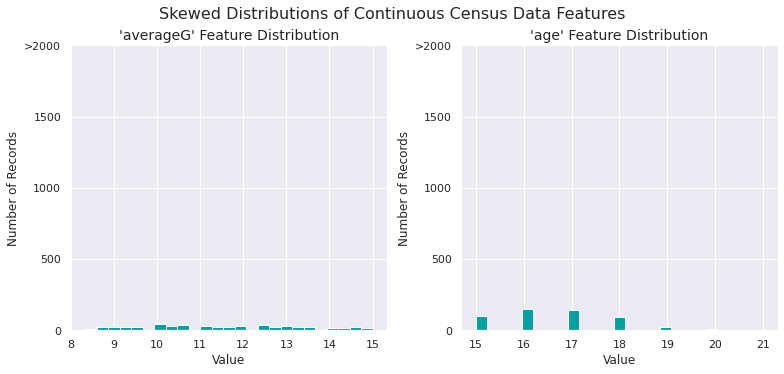

In [ ]:
# Visualize skewed continuous features of original data
distribution(df3)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [ ]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'averageG', 'absences']

df3_minmax= pd.DataFrame(data = df3)
df3_minmax[numerical] = scaler.fit_transform(df3_minmax[numerical])

# Show an example of a record with scaling applied
display(df3_minmax.head(n = 5))

,school,sex,age,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,...,goout,Dalc,Walc,health,absences,G1,G2,G3,averageG,Pedu
1,GP,F,0.333333,U,GT3,T,at_home,other,course,father,...,3,1,1,3,0.0625,9,11,11,0.30,1.0
2,GP,F,0.000000,U,LE3,T,at_home,other,other,mother,...,2,2,3,3,0.1875,12,13,12,0.60,1.0
3,GP,F,0.000000,U,GT3,T,health,services,home,mother,...,2,1,1,5,0.0000,14,14,14,0.85,3.0
4,GP,F,0.166667,U,GT3,T,other,other,home,father,...,2,1,2,5,0.0000,11,13,13,0.60,3.0
5,GP,M,0.166667,U,LE3,T,services,other,reputation,mother,...,2,1,2,5,0.1875,12,12,13,0.60,3.5


### One-Hot Encoding

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |


In [ ]:
# Split the data into features and target label
target = df3_minmax['higher']
features = df3_minmax.drop('higher', axis = 1)

In [ ]:
target.value_counts()

yes    471
no      48
Name: higher, dtype: int64

In [ ]:
dic = {'no' : 0, 'yes' : 1}
target_final = target.map(dic)

In [ ]:
target_final.value_counts()

1    471
0     48
Name: higher, dtype: int64

In [ ]:
# One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features)

In [ ]:
# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)

57 total features after one-hot encoding.
['age', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'averageG', 'Pedu', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes', 'internet_no', 'internet_yes', 'romantic_no', 'romantic_yes']


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    target_final, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 415 samples.
Testing set has 104 samples.


### Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.

In [ ]:
#  Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score

# This function will be used to assess classification models

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    #  Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    #  Calculate the training time
    results['train_time'] = end - start
        
    #  Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[0:300])
    end = time() # Get end time
    
    #  Calculate the total prediction time
    results['pred_time'] = end - start
            
    #  Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[0:300],predictions_train)
        
    #  Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    #  Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score( y_train[0:300],predictions_train, beta = 0.5)
        
    #  Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score( y_test,predictions_test, beta = 0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [ ]:
TP = np.sum(target_final) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data  encoded to numerical values done in the data preprocessing step.
FP = target_final.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

#  : Calculate accuracy, precision and recall
accuracy = TP/target_final.count()
recall = TP / (TP + TN)
precision = TP / (TP + FP)

#  : Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
b = 2
fscore = (1+pow(b,2))*((precision*recall)/((pow(b,2)*precision)+recall))


# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f},recall score: {:.4f},precision score: {:.4f}, F-score: {:.4f}]".format(accuracy,recall,precision, fscore))

Naive Predictor: [Accuracy score: 0.9075,recall score: 1.0000,precision score: 0.9075, F-score: 0.9800]


1
DecisionTreeClassifier trained on 41 samples.
DecisionTreeClassifier trained on 207 samples.
DecisionTreeClassifier trained on 415 samples.
1
RandomForestClassifier trained on 41 samples.
RandomForestClassifier trained on 207 samples.
RandomForestClassifier trained on 415 samples.
1
SVC trained on 41 samples.
SVC trained on 207 samples.
SVC trained on 415 samples.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


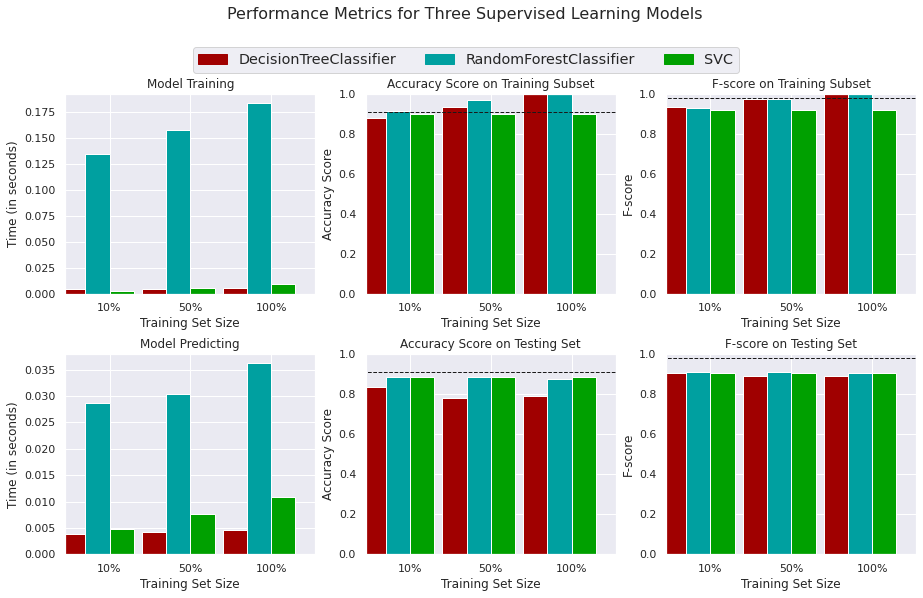

In [ ]:
#  : Import the three supervised learning models from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#  : Initialize the three models
clf_A = DecisionTreeClassifier(random_state=1)
clf_B = RandomForestClassifier(random_state=1)
clf_C = SVC(random_state=1)

#  : Calculate the number of samples for 1%, 10%, and 100% of the training data
# : samples_100 is the entire training set i.e. len(y_train)
# : samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# : samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(len(y_train)*0.5)
samples_1 = int(len(y_train)*0.1)

y_train=y_train.astype('int')
y_test=y_test.astype('int')

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    print(1)
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1,samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
evaluate(results, accuracy, fscore)

Now according to the above results, the highest F-score on the testing set goes to both **SVM** and **RF**. However, we will proceed our work with the **RF** model.

### Model Tuning
Now we will fine tune the chosen model. We will use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. We will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [ ]:
#   Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [ ]:
#   Initialize the classifier
clf = RandomForestClassifier(random_state=1)

#   Create the parameters list you wish to tune, using a dictionary if needed.
#  parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'n_estimators': [50, 100, 200, 400], 'min_samples_split': [2, 4, 8 ,16],'min_samples_leaf': [1, 2, 4, 8, 16]}

#   Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

#   Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

#   Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8750
F-score on testing data: 0.9073

Optimized Model
------
Final accuracy score on the testing data: 0.8846
Final F-score on the testing data: 0.9100


#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |        0.8750           |         0.8846         |
| F-score        |        0.9073          |          0.9100       |


### Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do.

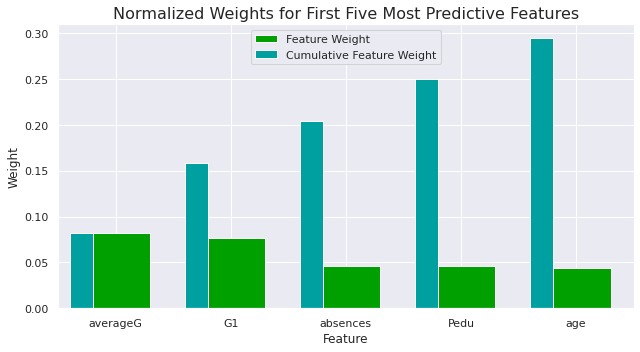

In [ ]:
# I used the same RF model from the Grid-Search step:

#   Extract the feature importances using .feature_importances_ 
importances = best_clf.feature_importances_

# Plot
feature_plot(importances, X_train, y_train)

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data.

In [ ]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8846
F-score on testing data: 0.9100

Final Model trained on reduced data
------
Accuracy on testing data: 0.9135
F-score on testing data: 0.9324


## Regression Model

Now, we will try to answer the following question:


> ***Q:*** a.	Is there a relationship between the final grade and other student attributes? Can we predict **averageG**?


### One-Hot Encoding

In [ ]:
df3_minmax.to_csv(r'data_cleaned.csv', index=False)

In [ ]:
# Split the data into features and target label
target_final = df3_minmax['averageG']
features = df3_minmax.drop(['averageG','G1','G2','G3'], axis = 1)

In [ ]:
features.shape

(519, 29)

In [ ]:
#  : One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features)

In [ ]:
features_final.shape

(519, 55)

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    target_final, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 415 samples.
Testing set has 104 samples.


In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
reg.score(X_test,y_test)

0.23944459366759718

In [ ]:
from sklearn.linear_model import Ridge
reg_ridge = Ridge(alpha=100)
reg_ridge.fit(X_train,y_train)

Ridge(alpha=100)

In [ ]:
reg_ridge.score(X_test,y_test)

0.30897738924507145

In [ ]:
reg_ridge.coef_

array([-0.00829353, -0.0020882 ,  0.01936856, -0.06839503,  0.00957966,
        0.00159349,  0.00254612, -0.02878983, -0.00609299, -0.01440305,
       -0.01510398,  0.03624939,  0.03268159, -0.03268159,  0.01925531,
       -0.01925531, -0.00506541,  0.00506541, -0.00331776,  0.00331776,
        0.00840662, -0.00840662, -0.02482745,  0.01074993,  0.0074557 ,
        0.01158116, -0.00495935, -0.00215776, -0.01006367,  0.00593061,
       -0.01054396,  0.01683478, -0.00918298,  0.01418535, -0.01549523,
        0.01049286,  0.01252786, -0.00954767, -0.0029802 ,  0.02040888,
       -0.02040888,  0.01217311, -0.01217311,  0.00297709, -0.00297709,
       -0.01846294,  0.01846294, -0.01050991,  0.01050991, -0.03673307,
        0.03673307, -0.00234781,  0.00234781,  0.0055901 , -0.0055901 ])

As shwon above, fitting with all the variables gave a bad linear model (R2 = 0.4295), hence, in the next step, we will fit the model using only one variable, and that is **G1**. We chose 'G1' because it represents the most important feature according to the five most important features plot shown below.

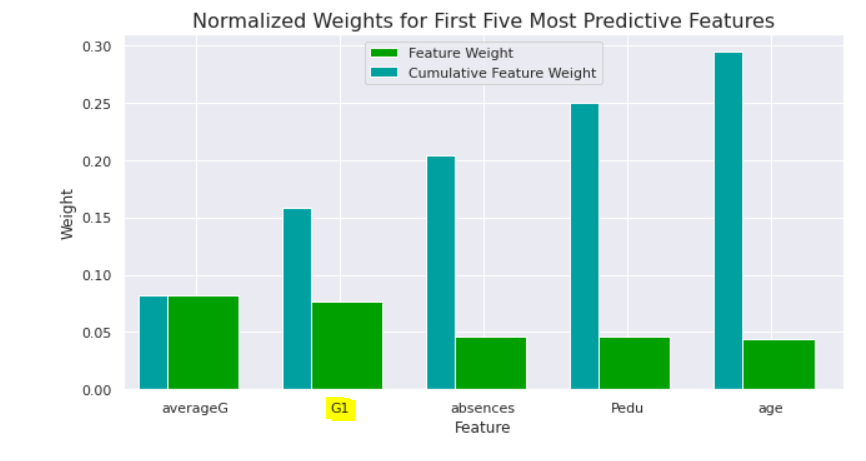

In [ ]:
# Split the data into features and target label
target_final = df3_minmax['averageG']
features = df3_minmax['G1']

In [ ]:
features_final =  np.asarray(features)

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    target_final, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 415 samples.
Testing set has 104 samples.


In [ ]:
X_train = X_train.reshape(-1,1)

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
X_test = X_test.reshape(-1,1)

In [ ]:
reg.score(X_test,y_test)

0.8440744457988977

As we can see, we got a way better result. Now, given the grade of the first major, we can predict the final grade of the student. However, this is not too useful since we already know that **G1** is directly related to **averageG**.

What is more interesting is to what are we going to perform in the next section:

## Classification Model (II)

Now, we will a different classification task:

First, we will create a new column called **Letter Grade**. Then we are going to predict that letter grade *without knowing the grades of the studnts*.

> ***Q:*** What is the letter grade of the student without knowing the grades (G1, G2, G3)?



In [ ]:
df_temp = df2[df2.averageG >= lower]
df3 = df_temp[df_temp.averageG <= upper]

### Create the new variable 'Pass'.

In [ ]:
# Code from: https://www.kaggle.com/code/sharonyaroshetsky/annual-grades-average-5-level-classification/notebook
def five_level_classification():
    bins = pd.IntervalIndex.from_tuples(
        [(0, 9.5), (9.5, 20)], closed='right')

    levels = ['Fail', 'Pass']

    new_column = 'Pass'
    df3[new_column] = np.array(levels)[
        pd.cut(df3['averageG'], bins=bins).cat.codes]

In [ ]:
five_level_classification()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'averageG', 'absences']

df3_minmax= pd.DataFrame(data = df3)
df3_minmax[numerical] = scaler.fit_transform(df3_minmax[numerical])

# Show an example of a record with scaling applied
display(df3_minmax.head(n = 5))

,school,sex,age,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,...,Dalc,Walc,health,absences,G1,G2,G3,averageG,Pedu,Pass
1,GP,F,0.333333,U,GT3,T,at_home,other,course,father,...,1,1,3,0.0625,9,11,11,0.30,1.0,Pass
2,GP,F,0.000000,U,LE3,T,at_home,other,other,mother,...,2,3,3,0.1875,12,13,12,0.60,1.0,Pass
3,GP,F,0.000000,U,GT3,T,health,services,home,mother,...,1,1,5,0.0000,14,14,14,0.85,3.0,Pass
4,GP,F,0.166667,U,GT3,T,other,other,home,father,...,1,2,5,0.0000,11,13,13,0.60,3.0,Pass
5,GP,M,0.166667,U,LE3,T,services,other,reputation,mother,...,1,2,5,0.1875,12,12,13,0.60,3.5,Pass


In [ ]:
# Split the data into features and target label
target = df3_minmax['Pass']
features = df3_minmax.drop(['Pass','G1','G2','G3','averageG'], axis = 1)

In [ ]:
target.value_counts()

Pass    446
Fail     73
Name: Pass, dtype: int64

In [ ]:
#  : One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features)

In [ ]:
# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)

55 total features after one-hot encoding.
['age', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'Pedu', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no', 'romantic_yes']


In [ ]:
dic = {'Fail' : 0, 'Pass' : 1}
target_final = target.map(dic)

In [ ]:
target_final.value_counts()

1    446
0     73
Name: Pass, dtype: int64

### Shuffle and Split Data

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    target_final, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 415 samples.
Testing set has 104 samples.


### Implementation - Creating a Training and Predicting Pipeline

In [ ]:
from numpy.lib.function_base import average
#  : Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score

# This function will be used to assess classification models

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    #  : Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    #  : Calculate the training time
    results['train_time'] = end - start
        
    #  : Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[0:300])
    end = time() # Get end time
    
    #  : Calculate the total prediction time
    results['pred_time'] = end - start
            
    #  : Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[0:300],predictions_train)
        
    #  : Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    #  : Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score( y_train[0:300],predictions_train, beta = 2)
        
    #  : Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score( y_test,predictions_test, beta = 2)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

1
DecisionTreeClassifier trained on 41 samples.
DecisionTreeClassifier trained on 207 samples.
DecisionTreeClassifier trained on 415 samples.
1
RandomForestClassifier trained on 41 samples.
RandomForestClassifier trained on 207 samples.
RandomForestClassifier trained on 415 samples.
1
SVC trained on 41 samples.
SVC trained on 207 samples.
SVC trained on 415 samples.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


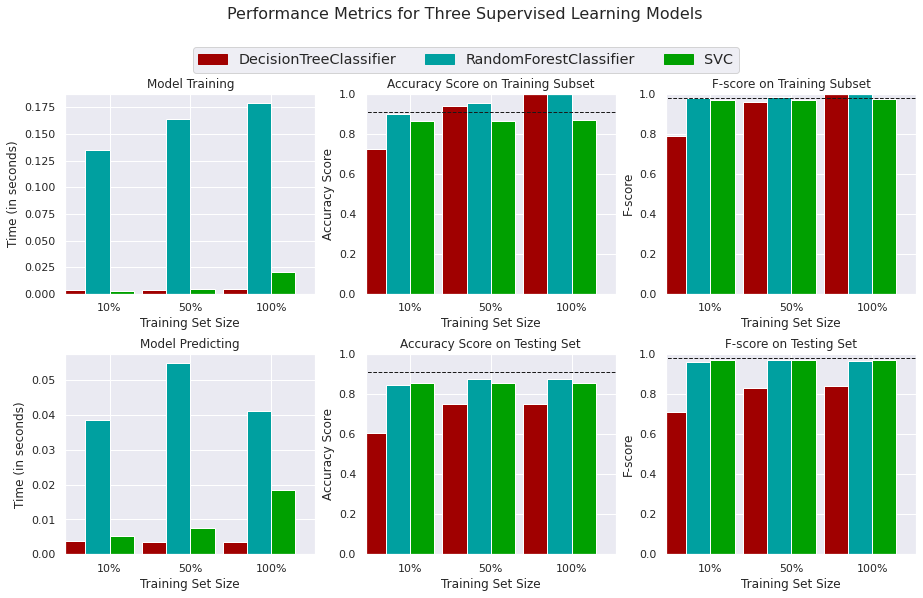

In [ ]:
#   Import the three supervised learning models from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#   Initialize the three models
clf_A = DecisionTreeClassifier(random_state=1)
clf_B = RandomForestClassifier(random_state=1)
clf_C = SVC(random_state=1)

#   Calculate the number of samples for 1%, 10%, and 100% of the training data
#  samples_100 is the entire training set i.e. len(y_train)
#  samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
#  samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(len(y_train)*0.5)
samples_1 = int(len(y_train)*0.1)

y_train=y_train.astype('int')
y_test=y_test.astype('int')

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    print(1)
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1,samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
evaluate(results, accuracy, fscore)

It seems that this a hard classification task, however, we will continue with the highest score, and try to tune the results.

Therefore, we will continue our work with the SVC model.

### Model Tuning

In [ ]:
#  : Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [ ]:
#   Initialize the classifier
clf = SVC(random_state=1)

#   Create the parameters list you wish to tune, using a dictionary if needed.
#  parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'C': [0.5, 1, 4, 8, 16], 'gamma': [2, 4, 8 ,16],'kernel': ['rbf', 'sigmoid']}

#  Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=2)

#   Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

#   Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 2)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 2)))

Unoptimized model
------
Accuracy score on testing data: 0.8558
F-score on testing data: 0.9674

Optimized Model
------
Final accuracy score on the testing data: 0.8558
Final F-score on the testing data: 0.9674


#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |        0.8558           |         0.8558        |
| F-score        |        0.9674           |          0.9674        |


In [ ]:
#  : Initialize the classifier
clf = RandomForestClassifier(random_state=1)

#   Create the parameters list you wish to tune, using a dictionary if needed.
#  parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'n_estimators': [50, 100, 200, 400], 'min_samples_split': [2, 4, 8 ,16],'min_samples_leaf': [1, 2, 4, 8, 16]}

#   Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=2)

#   Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

#  Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 2)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 2)))

Unoptimized model
------
Accuracy score on testing data: 0.8750
F-score on testing data: 0.9649

Optimized Model
------
Final accuracy score on the testing data: 0.8558
Final F-score on the testing data: 0.9674


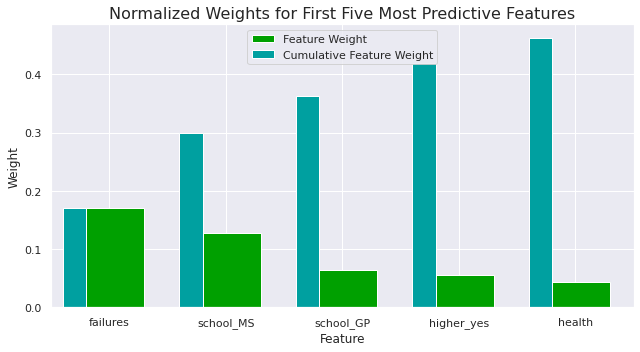

In [ ]:
# I used the same RF model from the Grid-Search step:

importances = best_clf.feature_importances_

# Plot
feature_plot(importances, X_train, y_train)

# Linear regression 

In [ ]:
import pandas as pd 

In [ ]:
df = pd.read_csv("data_cleaned.csv")

In [ ]:
df.describe()

,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,averageG,Pedu
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.00000,519.000000,519.000000,519.000000,519.000000
mean,0.275530,1.583815,1.911368,0.186898,3.921002,3.184971,3.167630,1.510597,2.296724,3.595376,0.118678,11.26975,11.454721,11.921002,0.482274,2.380539
std,0.203410,0.768723,0.826589,0.539682,0.952300,1.047375,1.182576,0.917117,1.282722,1.413551,0.145567,1.96211,1.856163,1.919098,0.269444,1.012083
min,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,6.00000,7.000000,8.000000,0.000000,0.000000
25%,0.166667,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,10.00000,10.000000,10.000000,0.250000,1.500000
50%,0.333333,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.062500,11.00000,11.000000,12.000000,0.450000,2.000000
75%,0.333333,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,0.187500,13.00000,13.000000,13.000000,0.700000,3.000000
max,1.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,16.00000,16.000000,16.000000,1.000000,4.000000


In [ ]:
df = df.drop("G1", 1)
df = df.drop("G2", 1)
df = df.drop("G3", 1)
df2 =df.drop("averageG",1)

/var/folders/rx/60_hzz_110zf890c5tp3m_0r0000gn/T/ipykernel_48203/1753400365.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop("G1", 1)
/var/folders/rx/60_hzz_110zf890c5tp3m_0r0000gn/T/ipykernel_48203/1753400365.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop("G2", 1)
/var/folders/rx/60_hzz_110zf890c5tp3m_0r0000gn/T/ipykernel_48203/1753400365.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop("G3", 1)
/var/folders/rx/60_hzz_110zf890c5tp3m_0r0000gn/T/ipykernel_48203/1753400365.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 =df.drop("averageG",1)


In [ ]:
df2.describe()

,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,Pedu
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,0.275530,1.583815,1.911368,0.186898,3.921002,3.184971,3.167630,1.510597,2.296724,3.595376,0.118678,2.380539
std,0.203410,0.768723,0.826589,0.539682,0.952300,1.047375,1.182576,0.917117,1.282722,1.413551,0.145567,1.012083
min,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.166667,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,1.500000
50%,0.333333,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.062500,2.000000
75%,0.333333,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,0.187500,3.000000
max,1.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,4.000000


In [ ]:
df3 = pd.get_dummies(df2, columns = ['Mjob', 'Fjob','address','famsize','Pstatus','reason','guardian','schoolsup','sex'
                                   ,'school','guardian','schoolsup','famsup','paid','nursery','higher','internet',
                                    'romantic','activities'])

In [ ]:
df3.describe()

,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,...,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,activities_no,activities_yes
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,...,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,0.275530,1.583815,1.911368,0.186898,3.921002,3.184971,3.167630,1.510597,2.296724,3.595376,...,0.204239,0.795761,0.092486,0.907514,0.227360,0.772640,0.635838,0.364162,0.512524,0.487476
std,0.203410,0.768723,0.826589,0.539682,0.952300,1.047375,1.182576,0.917117,1.282722,1.413551,...,0.403533,0.403533,0.289990,0.289990,0.419532,0.419532,0.481659,0.481659,0.500325,0.500325
min,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.166667,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.333333,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,0.333333,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df3, df.averageG, test_size=0.2)

In [ ]:
y=df.averageG

In [ ]:
y

0      0.30
1      0.60
2      0.85
3      0.60
4      0.60
       ... 
514    0.05
515    0.30
516    0.35
517    0.25
518    0.35
Name: averageG, Length: 519, dtype: float64

In [ ]:
df3

,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,...,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,activities_no,activities_yes
0,0.333333,1,2,0,5,3,3,1,1,3,...,1,0,0,1,0,1,1,0,1,0
1,0.000000,1,2,0,4,3,2,2,3,3,...,0,1,0,1,0,1,1,0,1,0
2,0.000000,1,3,0,3,2,2,1,1,5,...,0,1,0,1,0,1,0,1,0,1
3,0.166667,1,2,0,4,3,2,1,2,5,...,0,1,0,1,1,0,1,0,1,0
4,0.166667,1,2,0,5,4,2,1,2,5,...,0,1,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,0.500000,3,1,0,4,4,3,2,2,5,...,0,1,0,1,0,1,0,1,0,1
515,0.666667,1,3,1,5,4,2,1,2,5,...,1,0,0,1,0,1,1,0,0,1
516,0.500000,2,2,0,1,1,1,1,1,5,...,0,1,0,1,1,0,1,0,0,1
517,0.333333,2,1,0,2,4,5,3,4,2,...,1,0,0,1,0,1,1,0,1,0


In [ ]:
import statsmodels.api as sm
mod = sm.OLS(y,df3)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               averageG   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     7.114
Date:                Wed, 11 May 2022   Prob (F-statistic):           7.18e-28
Time:                        18:20:10   Log-Likelihood:                 60.614
No. Observations:                 519   AIC:                            -43.23
Df Residuals:                     480   BIC:                             122.6
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                  -0.0044      0.05

In [ ]:
df4= df3.drop('age',1)
df4= df4.drop('Walc',1)
df4= df4.drop('Fjob_at_home',1)
df4= df4.drop('Fjob_other',1) 
df4= df4.drop('guardian_mother',1)

/var/folders/rx/60_hzz_110zf890c5tp3m_0r0000gn/T/ipykernel_48203/4022676510.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df4= df3.drop('age',1)
/var/folders/rx/60_hzz_110zf890c5tp3m_0r0000gn/T/ipykernel_48203/4022676510.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df4= df4.drop('Walc',1)
/var/folders/rx/60_hzz_110zf890c5tp3m_0r0000gn/T/ipykernel_48203/4022676510.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df4= df4.drop('Fjob_at_home',1)
/var/folders/rx/60_hzz_110zf890c5tp3m_0r0000gn/T/ipykernel_48203/4022676510.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df4= df4.drop('Fjob_other',1)
/var/folders/rx/60_hzz_110zf890

In [ ]:
mod2 = sm.OLS(y,df4)
res2 = mod2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:               averageG   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     7.770
Date:                Wed, 11 May 2022   Prob (F-statistic):           3.41e-29
Time:                        18:20:20   Log-Likelihood:                 60.589
No. Observations:                 519   AIC:                            -49.18
Df Residuals:                     483   BIC:                             103.9
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
traveltime           -0.0119      0.01

In [ ]:
df5= df4.drop('schoolsup_yes',1)
df5= df5.drop('reason_course',1)  
df5= df5.drop('reason_other',1) 
df5= df5.drop('Mjob_teacher',1) 
df5= df5.drop('goout',1) 

/var/folders/rx/60_hzz_110zf890c5tp3m_0r0000gn/T/ipykernel_48203/704064185.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df5= df4.drop('schoolsup_yes',1)
/var/folders/rx/60_hzz_110zf890c5tp3m_0r0000gn/T/ipykernel_48203/704064185.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df5= df5.drop('reason_course',1)
/var/folders/rx/60_hzz_110zf890c5tp3m_0r0000gn/T/ipykernel_48203/704064185.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df5= df5.drop('reason_other',1)
/var/folders/rx/60_hzz_110zf890c5tp3m_0r0000gn/T/ipykernel_48203/704064185.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df5= df5.drop('Mjob_teacher',1)
/var/folders/r

In [ ]:
mod3 = sm.OLS(y,df5)
res3 = mod3.fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:               averageG   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     8.254
Date:                Wed, 11 May 2022   Prob (F-statistic):           5.00e-30
Time:                        18:20:27   Log-Likelihood:                 60.346
No. Observations:                 519   AIC:                            -52.69
Df Residuals:                     485   BIC:                             91.87
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
traveltime           -0.0128      0.01

In [ ]:
df6=df5.drop('sex_M',1)
mod4 = sm.OLS(y,df6)
res4 = mod4.fit()
print(res4.summary())

                            OLS Regression Results                            
Dep. Variable:               averageG   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     8.254
Date:                Wed, 11 May 2022   Prob (F-statistic):           5.00e-30
Time:                        18:20:32   Log-Likelihood:                 60.346
No. Observations:                 519   AIC:                            -52.69
Df Residuals:                     485   BIC:                             91.87
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
traveltime           -0.0128      0.01

/var/folders/rx/60_hzz_110zf890c5tp3m_0r0000gn/T/ipykernel_48203/683270753.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df6=df5.drop('sex_M',1)


In [ ]:
df7=df6.drop('famrel',1)
df7=df7.drop('freetime',1)
df7=df7.drop('traveltime',1)
mod5 = sm.OLS(y,df7)
res5 = mod5.fit()
print(res5.summary())

                            OLS Regression Results                            
Dep. Variable:               averageG   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     9.030
Date:                Wed, 11 May 2022   Prob (F-statistic):           4.56e-31
Time:                        18:21:23   Log-Likelihood:                 59.268
No. Observations:                 519   AIC:                            -56.54
Df Residuals:                     488   BIC:                             75.27
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
studytime             0.0242      0.01

/var/folders/rx/60_hzz_110zf890c5tp3m_0r0000gn/T/ipykernel_48203/1317995318.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df7=df6.drop('famrel',1)
/var/folders/rx/60_hzz_110zf890c5tp3m_0r0000gn/T/ipykernel_48203/1317995318.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df7=df7.drop('freetime',1)
/var/folders/rx/60_hzz_110zf890c5tp3m_0r0000gn/T/ipykernel_48203/1317995318.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df7=df7.drop('traveltime',1)


In [ ]:
df8=df7.drop('paid_yes',1)
df8=df8.drop('nursery_no',1)
df8=df8.drop('romantic_yes',1)
df8=df8.drop('internet_no',1)
df8=df8.drop('famsup_yes',1)
df8=df8.drop('activities_no',1)
df8=df8.drop('Mjob_at_home',1)
df8=df8.drop('Fjob_health',1)
df8=df8.drop('Pstatus_T',1)
df8=df8.drop('Pstatus_A',1)
df8=df8.drop('paid_no',1)
mod6 = sm.OLS(y,df8)
res6 = mod6.fit()
print(res6.summary())

                            OLS Regression Results                            
Dep. Variable:               averageG   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     10.42
Date:                Wed, 11 May 2022   Prob (F-statistic):           8.12e-33
Time:                        18:43:29   Log-Likelihood:                 58.559
No. Observations:                 519   AIC:                            -63.12
Df Residuals:                     492   BIC:                             51.68
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
studytime             0.0235      0.01

/var/folders/rx/60_hzz_110zf890c5tp3m_0r0000gn/T/ipykernel_48203/3809558012.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df8=df7.drop('paid_yes',1)
/var/folders/rx/60_hzz_110zf890c5tp3m_0r0000gn/T/ipykernel_48203/3809558012.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df8=df8.drop('nursery_no',1)
/var/folders/rx/60_hzz_110zf890c5tp3m_0r0000gn/T/ipykernel_48203/3809558012.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df8=df8.drop('romantic_yes',1)
/var/folders/rx/60_hzz_110zf890c5tp3m_0r0000gn/T/ipykernel_48203/3809558012.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df8=df8.drop('internet_no',1)
/var/folders/rx/60_hzz_

In [ ]:
df9=df8.drop('internet_yes',1)
df9=df9.drop('higher_no',1)
df9=df9.drop('nursery_yes',1)
df9=df9.drop('school_MS',1)
df9=df9.drop('famsup_no',1)
df9=df9.drop('reason_reputation',1)
df9=df9.drop('Fjob_teacher',1)
df9=df9.drop('Fjob_services',1)
df9=df9.drop('Mjob_services',1)
df9=df9.drop('Mjob_health',1)
df9=df9.drop('famsize_GT3',1)
df9=df9.drop('famsize_LE3',1)
mod7 = sm.OLS(y,df9)
res7 = mod7.fit()
print(res7.summary())

                            OLS Regression Results                            
Dep. Variable:               averageG   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     14.58
Date:                Wed, 11 May 2022   Prob (F-statistic):           3.84e-34
Time:                        18:55:14   Log-Likelihood:                 49.018
No. Observations:                 519   AIC:                            -62.04
Df Residuals:                     501   BIC:                             14.50
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
studytime           0.0227      0.013     

/var/folders/rx/60_hzz_110zf890c5tp3m_0r0000gn/T/ipykernel_48203/3937745493.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df9=df8.drop('internet_yes',1)
/var/folders/rx/60_hzz_110zf890c5tp3m_0r0000gn/T/ipykernel_48203/3937745493.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df9=df9.drop('higher_no',1)
/var/folders/rx/60_hzz_110zf890c5tp3m_0r0000gn/T/ipykernel_48203/3937745493.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df9=df9.drop('nursery_yes',1)
/var/folders/rx/60_hzz_110zf890c5tp3m_0r0000gn/T/ipykernel_48203/3937745493.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df9=df9.drop('school_MS',1)
/var/folders/rx/60_hzz_

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df9, y, test_size=0.2)

In [ ]:
mod8 = sm.OLS(y_train,X_train)
res8 = mod8.fit()
print(res8.summary())

                            OLS Regression Results                            
Dep. Variable:               averageG   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     11.64
Date:                Wed, 11 May 2022   Prob (F-statistic):           5.50e-26
Time:                        19:25:09   Log-Likelihood:                 50.346
No. Observations:                 415   AIC:                            -64.69
Df Residuals:                     397   BIC:                             7.818
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
studytime           0.0176      0.014     

In [ ]:
ypred_train = res8.predict(X_train)

In [ ]:
from statsmodels.tools.eval_measures import rmse
rmse = rmse(y_train, ypred_train)
print(rmse)

0.21432683828646565


In [ ]:
ypred = res8.predict(X_test)

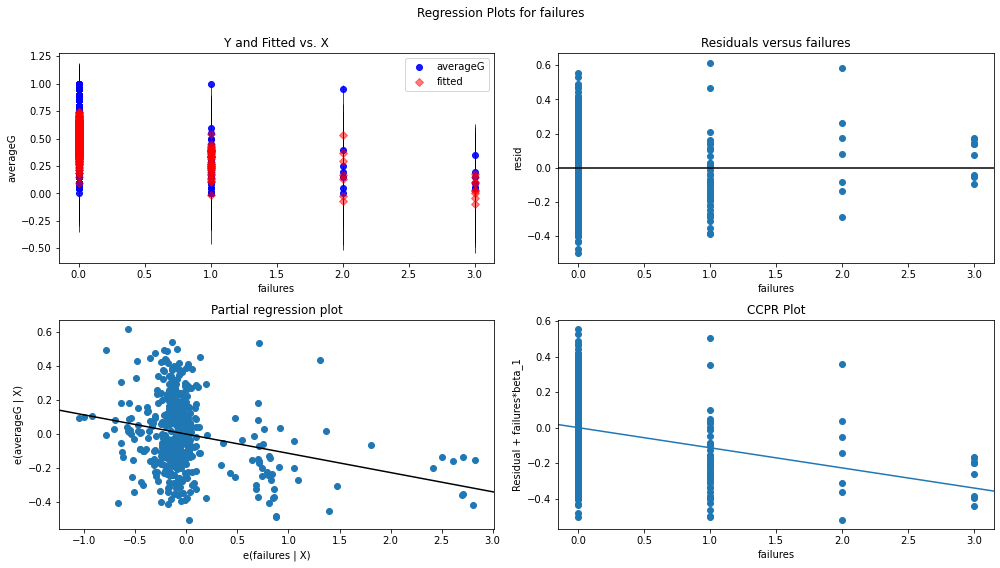

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(res8, 'failures', fig=fig)

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


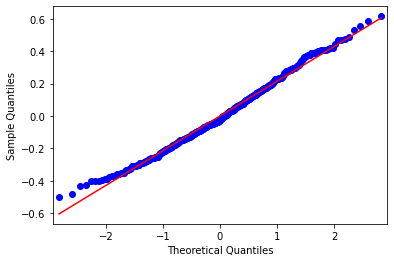

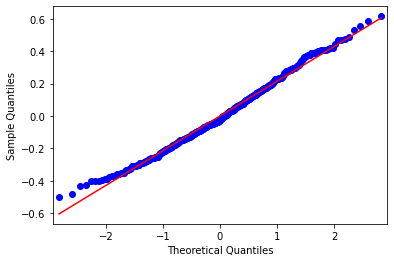

In [ ]:
import seaborn as sns
sm.qqplot(res8.resid, line='s')

In [ ]:
pred_val = res8.fittedvalues.copy()
true_val = y_train.values.copy()
residual = true_val - pred_val

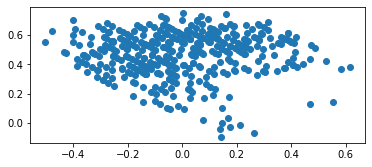

In [ ]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, pred_val)

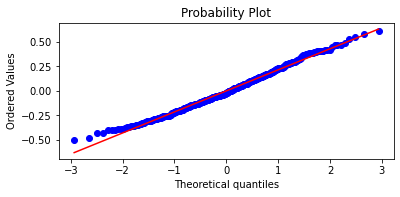

In [ ]:
 import scipy as sp
 fig, ax = plt.subplots(figsize=(6,2.5))
 _, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

Text(0, 0.5, 'Residuals')

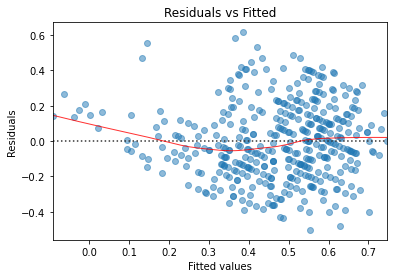

In [ ]:
model_fitted_y = res8.fittedvalues

#  Plot
plot = sns.residplot(x=model_fitted_y, y=y_train, lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

# Titel and labels
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals')

# The end.